# Mid-Term Project

#### Overview
- Use Medicare CCLF Claims from Syntegra dataset to answer key business questions
- Extra credit for building up on the questions below (additional questions + answers)
- One Jupyter notebook solution with clear Python code and all cell outputs available
- At least two data quality checks

## Step 0. Prepare raw input datasets

Here we will 1) load original datasets, 2) remove unused columns, 3) de-duplicate rows, and 4) join datasets, not necessarily in this order

Assumptions: 
- Claim ID (cur_clm_uniq_id) represents one claim, which may or may not have more than one code (code could be HCPCS/CPT, diagnosis, procedure...)
- There is a one-to-many relationship between patient IDs (bene_mbi_id) and claim IDs (cur_clm_uniq_id), i.e. each claim is unique to one patient, but one patient can have more than one claim

### 0.1 Import required packages

In [776]:
import numpy as np
import pandas as pd

In [777]:
# Turn off the automatic setting that redacts the columns/rows from the dataframe output
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', 200)

### 0.2 Load & select columns to be used from raw (original) datasets

### 0.2.1 Load & select columns from Claims Header dataset

In [778]:
# Load Claims Header dataset
parta_claims_header_raw_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\parta_claims_header.csv")
parta_claims_header_raw_df.sort_values(by=['cur_clm_uniq_id'])

,cur_clm_uniq_id,prvdr_oscar_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_bill_fac_type_cd,clm_bill_clsfctn_cd,prncpl_dgns_cd,admtg_dgns_cd,clm_mdcr_npmt_rsn_cd,clm_pmt_amt,clm_nch_prmry_pyr_cd,prvdr_fac_fips_st_cd,bene_ptnt_stus_cd,dgns_drg_cd,clm_op_srvc_type_cd,fac_prvdr_npi_num,oprtg_prvdr_npi_num,atndg_prvdr_npi_num,othr_prvdr_npi_num,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,bene_eqtbl_bic_hicn_num,clm_admsn_type_cd,clm_admsn_src_cd,clm_bill_freq_cd,clm_query_cd,dgns_prcdr_icd_ind,clm_mdcr_instnl_tot_chrg_amt,clm_mdcr_ip_pps_cptl_ime_amt,clm_oprtnl_ime_amt,clm_mdcr_ip_pps_dsprprtnt_amt,clm_hipps_uncompd_care_amt,clm_oprtnl_dsprtnt_amt
510,100190,111821,1228,NaN,40,2018-06-10,2018-06-10,7,7,M1611,NaN,NaN,127.79,NaN,11,1,NaN,F,1780608992,NaN,1.972732e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,415.80,NaN,NaN,NaN,NaN,NaN
521,100402,100226,1261,NaN,60,2017-05-27,2017-06-02,1,1,K5733,K5733,NaN,10602.46,NaN,10,6,330.0,NaN,1689611501,NaN,1.285688e+09,NaN,NaN,NaN,NaN,NaN,1.0,1,1,3,0,70795.63,609.13,0.00,13.92,231.15,NaN
525,100464,360051,12978,NaN,40,2017-06-26,2017-06-26,1,3,R079,NaN,NaN,199.45,NaN,36,1,NaN,C,1073688354,NaN,1.982693e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,2709.80,NaN,NaN,NaN,NaN,NaN
536,100698,140276,11789,NaN,40,2017-07-28,2017-07-28,1,3,M545,NaN,NaN,85.25,NaN,14,1,NaN,C,1376521575,NaN,1.912991e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,115.00,NaN,NaN,NaN,NaN,NaN
540,100750,230216,12138,NaN,40,2018-01-13,2018-01-13,1,3,Z0289,NaN,N,0.00,NaN,23,9,NaN,C,1982685384,NaN,1.063442e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,0,226.00,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
230,1698691,390145,10007,NaN,40,2016-12-11,2016-12-11,1,3,Z01818,NaN,NaN,43.01,NaN,39,1,NaN,C,1689691214,NaN,1.679505e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,235.00,NaN,NaN,NaN,NaN,NaN
4365,1698722,200021,10985,NaN,40,2018-06-16,2018-06-16,1,3,E782,NaN,NaN,179.09,NaN,20,1,NaN,C,1932164795,NaN,1.548289e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,1939.35,NaN,NaN,NaN,NaN,NaN
4366,1698935,210022,1297,NaN,40,2018-04-06,2018-04-06,1,3,I110,NaN,NaN,400.81,NaN,21,9,NaN,C,1205896446,NaN,1.922016e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,554.00,NaN,NaN,NaN,NaN,NaN
4367,1699005,100057,12194,NaN,40,2016-04-27,2016-04-27,1,3,I348,NaN,NaN,265.19,NaN,10,1,NaN,C,1821019571,NaN,1.437130e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,0,8423.00,NaN,NaN,NaN,NaN,NaN


#### Data Quality Check #1: If true, the original dataset was unique on claim ID

In [779]:
parta_claims_header_raw_df_count = parta_claims_header_raw_df.shape[0]
parta_claims_header_raw_uniq_clm_id_df = parta_claims_header_raw_df['cur_clm_uniq_id'].drop_duplicates()

parta_claims_header_raw_df_count == parta_claims_header_raw_uniq_clm_id_df.shape[0]

True

In [780]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
parta_claims_header_df = parta_claims_header_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'atndg_prvdr_npi_num', 
    'clm_from_dt', 'prncpl_dgns_cd', 'clm_pmt_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'atndg_prvdr_npi_num': 'npi_id'
    }
)
parta_claims_header_df

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt
0,1001595,10226,1.366492e+09,2018-02-28,M25551,259.01
1,1004555,10133,1.942275e+09,2018-11-02,Z9861,29.56
2,1011605,10163,1.578546e+09,2018-01-02,C439,45.88
3,1011758,1003,1.952368e+09,2018-06-12,R310,9.40
4,101424,10052,1.336125e+09,2016-04-13,L821,34.18
...,...,...,...,...,...,...
8621,999774,10367,NaN,2017-11-06,R072,374.08
8622,999808,10496,1.740225e+09,2017-07-19,R079,360.89
8623,999878,12160,1.497784e+09,2018-01-18,R5383,90.73
8624,999961,12090,1.083691e+09,2018-03-10,C73,329.44


#### Data Quality Check #2: If true, the filtered dataset did not have any duplicates

In [781]:
parta_claims_header_df_count = parta_claims_header_df.shape[0]

parta_claims_header_raw_df_count == parta_claims_header_df_count

True

#### Data Quality Check #3: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [782]:
parta_claims_header_df.loc[~parta_claims_header_df.prncpl_dgns_cd.notnull()]

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt


### 0.2.2 Load & select columns from Claims Revenue Center dataset

In [783]:
# Load Claims Revenue Center dataset
# Note this dataset has more than one record for each claim ID (cur_clm_uniq_id)
# Also note there are two sets of date columns, 
#  one for claim ID (clm_from/thru_dt) and one for claim line (clm_line_from/thru_dt)
parta_claims_revenue_center_detail_raw_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\parta_claims_revenue_center_detail.csv")
parta_claims_revenue_center_detail_raw_df.sort_values(by=['cur_clm_uniq_id'])

C:\Users\ravik\AppData\Local\Temp\ipykernel_45748\965337124.py:5: DtypeWarning: Columns (19) have mixed types. Specify dtype option on import or set low_memory=False.
  parta_claims_revenue_center_detail_raw_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\parta_claims_revenue_center_detail.csv")


,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd
318,100073,1,12620,NaN,40,2018-12-02 00:00:00,2018-12-02 00:00:00,403,2018-12-02 00:00:00,77063,NaN,NaN,2018-12-02 00:00:00,2018-12-02 00:00:00,1,24.11,NaN,NaN,NaN,NaN,NaN,00000
383,100184,1,10080,NaN,40,2018-09-06 00:00:00,2018-09-06 00:00:00,1,NaN,NaN,NaN,NaN,2018-09-06 00:00:00,2018-09-06 00:00:00,0,0.00,NaN,NaN,NaN,NaN,NaN,00000
384,100190,1,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,G0467,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,133.74,NaN,NaN,NaN,NaN,NaN,00000
385,100190,2,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,98960,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000
386,100190,3,1228,NaN,40,2018-06-10 00:00:00,2018-06-10 00:00:00,521,2018-06-10 00:00:00,J1100,NaN,NaN,2018-06-10 00:00:00,2018-06-10 00:00:00,4,0.00,NaN,NaN,NaN,NaN,NaN,00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29896,1699197,2,1177,NaN,40,2016-05-22 00:00:00,2016-05-22 00:00:00,302,2016-05-22 00:00:00,86592,NaN,NaN,2016-05-22 00:00:00,2016-05-22 00:00:00,1,5.43,NaN,NaN,NaN,NaN,NaN,00000
29898,1699212,1,1262,NaN,60,2018-12-24 00:00:00,2018-12-25 00:00:00,730,NaN,NaN,NaN,NaN,2018-12-24 00:00:00,2018-12-25 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,00000
29901,1699236,3,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,370,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,2,0.00,NaN,NaN,NaN,NaN,NaN,00000
29899,1699236,1,10580,NaN,40,2017-09-20 00:00:00,2017-09-20 00:00:00,258,2017-09-20 00:00:00,NaN,NaN,NaN,2017-09-20 00:00:00,2017-09-20 00:00:00,1,0.00,NaN,NaN,NaN,NaN,NaN,00000


#### Data Quality Check #4: If the resulting dataframe is empty, it means there is no difference between columns 'clm_line_from_dt' and 'clm_from_dt' for all the rows

In [784]:
parta_claims_revenue_center_detail_raw_df.loc[
    ~(parta_claims_revenue_center_detail_raw_df['clm_line_from_dt'] 
      == parta_claims_revenue_center_detail_raw_df['clm_from_dt'])
]

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_prod_rev_ctr_cd,clm_line_instnl_rev_ctr_dt,clm_line_hcpcs_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_line_srvc_unit_qty,clm_line_cvrd_pd_amt,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_rev_apc_hipps_cd


In [785]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Select 'clm_from_dt' as the column for claim dates since we want uniqueness on claim ID, not claim line
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_from_dt',
    'clm_line_hcpcs_cd', 'clm_line_cvrd_pd_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code'
    }
)
parta_claims_revenue_center_detail_df

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.00
1,1001595,10226,2018-02-28 00:00:00,G0283,9.67
7,1001595,10226,2018-02-28 00:00:00,G8978,0.00
8,1001595,10226,2018-02-28 00:00:00,G8979,0.00
10,1001595,10226,2018-02-28 00:00:00,97110,24.97
...,...,...,...,...,...
59414,999961,12090,2018-03-10 00:00:00,A9516,0.00
59415,999961,12090,2018-03-10 00:00:00,G8996,0.00
59416,999976,10768,2016-01-18 00:00:00,80053,11.37
59417,999976,10768,2016-01-18 00:00:00,80061,12.83


#### Data Quality Check #5: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [786]:
parta_claims_revenue_center_detail_df.loc[
    ~parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
0,1001122,10081,2018-05-30 00:00:00,NaN,0.0
25,1001595,10226,2018-02-28 00:00:00,NaN,0.0
29,1004555,10133,2018-11-02 00:00:00,NaN,0.0
30,1004904,10106,2018-02-26 00:00:00,NaN,0.0
32,100974,10042,2017-02-20 00:00:00,NaN,0.0
...,...,...,...,...,...
59369,999008,12473,2018-08-04 00:00:00,NaN,0.0
59402,999774,10367,2017-11-06 00:00:00,NaN,0.0
59407,999808,10496,2017-07-19 00:00:00,NaN,0.0
59410,999943,11021,2016-11-20 00:00:00,NaN,0.0


In [787]:
# Data Quality Check #5 failed, so remove rows with no HCPCS codes
parta_claims_revenue_center_detail_df = parta_claims_revenue_center_detail_df.loc[
    parta_claims_revenue_center_detail_df.hcpcs_code.notnull()
]

In [788]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(
    parta_claims_revenue_center_detail_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_claims_revenue_center_detail_df

C:\Users\ravik\AppData\Local\Temp\ipykernel_45748\2671745514.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  parta_claims_revenue_center_detail_df['claim_date'] = pd.to_datetime(


,claim_id,patient_id,claim_date,hcpcs_code,clm_line_cvrd_pd_amt
1,1001595,10226,2018-02-28,G0283,9.67
7,1001595,10226,2018-02-28,G8978,0.00
8,1001595,10226,2018-02-28,G8979,0.00
10,1001595,10226,2018-02-28,97110,24.97
18,1001595,10226,2018-02-28,97140,20.33
...,...,...,...,...,...
59413,999961,12090,2018-03-10,78014,400.05
59414,999961,12090,2018-03-10,A9516,0.00
59415,999961,12090,2018-03-10,G8996,0.00
59416,999976,10768,2016-01-18,80053,11.37


#### Mini-Analysis #1: Find whether there are matching claims between Claim Header and Claims Revenue Center datasets

                                                ***

In [789]:
claims_header_unique_claims_df = parta_claims_header_df[[
    'claim_id'
]].drop_duplicates()

claims_header_unique_claims_df['header'] = 1

revenue_center_unique_claims_df = parta_claims_revenue_center_detail_df[[
    'claim_id'
]].drop_duplicates()

revenue_center_unique_claims_df['revenue'] = 1

joined_df1 = pd.merge(
    claims_header_unique_claims_df,
    revenue_center_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df1

,claim_id,header,revenue
0,1001595,1.0,1.0
1,1004555,1.0,1.0
2,1011605,1.0,1.0
3,1011758,1.0,1.0
4,101424,1.0,NaN
...,...,...,...
15721,999074,NaN,1.0
15722,999324,NaN,1.0
15723,999350,NaN,1.0
15724,999514,NaN,1.0


In [790]:
print('# of unique claims in Claims Header dataset: ' 
      + str(claims_header_unique_claims_df.shape[0])
     )
print('# of unique claims in Claims Revenue Center dataset: ' 
      + str(revenue_center_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header dataset: 8626
# of unique claims in Claims Revenue Center dataset: 13406


In [791]:
print('# of unique claims in Claims Header and Claims Revenue Center datasets combined: ' 
      + str(joined_df1.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only Claims Header dataset: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & ~(joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in only Claims Revenue Center dataset: ' 
      + str(joined_df1.loc[~(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )
print('# of unique claims in both Claims Header AND Claims Revenue Center datasets: ' 
      + str(joined_df1.loc[(joined_df1.header == 1) & (joined_df1.revenue == 1)].shape[0])
     )

# of unique claims in Claims Header and Claims Revenue Center datasets combined: 15726
From combined list of unique claims - 
# of unique claims in only Claims Header dataset: 2320
# of unique claims in only Claims Revenue Center dataset: 7100
# of unique claims in both Claims Header AND Claims Revenue Center datasets: 6306


Conclusion: There are quite a number of claims available in both datasets, so join them on claim ID as an outer join to get all possible claims without duplicates

                                                ***

### 0.2.3 Load & select columns from Diagnosis dataset

In [792]:
# Load the Diagnosis dataset
# Note that 'clm_from_dt' has some records with null values, but we need claim dates for all claims
parta_diagnosis_code_raw_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\parta_diagnosis_code.csv")
parta_diagnosis_code_raw_df.sort_values(by=['cur_clm_uniq_id', 'clm_val_sqnc_num'])

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_prod_type_cd,clm_val_sqnc_num,clm_dgns_cd,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,clm_poa_ind,dgns_prcdr_icd_ind
244,100190,1228,NaN,40,NaN,1,M1611,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
243,100190,1228,NaN,40,NaN,2,M25572,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
246,100190,1228,NaN,40,NaN,3,M25551,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
245,100190,1228,NaN,40,NaN,4,M5136,NaN,NaN,NaN,2018-06-10 00:00:00,NaN,0
366,100402,1261,NaN,60,NaN,11,E119,NaN,100256.0,2017-05-28 00:00:00,2017-06-02 00:00:00,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16232,1699102,11842,NaN,60,NaN,13,Z8673,NaN,330191.0,2017-01-31 00:00:00,2017-02-03 00:00:00,0,0
16236,1699137,10873,NaN,40,NaN,1,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16235,1699137,10873,NaN,40,NaN,2,N390,NaN,NaN,NaN,2018-07-12 00:00:00,NaN,0
16237,1699155,11689,NaN,40,NaN,3,K219,NaN,NaN,NaN,2018-12-06 00:00:00,NaN,0


In [793]:
# Select only the desired columns (renaming if needed) and remove duplicates if any
# Use 'clm_thru_dt' as claim date columns since 'clm_from_dt' has some nulls
parta_diagnosis_code_df = parta_diagnosis_code_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'clm_thru_dt', 'clm_dgns_cd'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'clm_thru_dt': 'claim_date'
    }
)
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30 00:00:00,K5289
1,1001595,10226,2018-02-28 00:00:00,M25551
2,1001595,10226,2018-02-28 00:00:00,M79604
3,1001865,10133,2018-09-14 00:00:00,G459
4,1004555,10133,2018-11-02 00:00:00,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18 00:00:00,N390
32048,999943,11021,2016-11-20 00:00:00,M545
32049,999961,12090,2018-03-10 00:00:00,C73
32050,999962,11030,2018-07-17 00:00:00,G8194


#### Data Quality Check #6: If the resulting dataframe is empty, it means all the records have values for 'clm_thru_dt' (if it's not empty it should be removed now since without claim dates it'd be difficult to use)

In [794]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.claim_date.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


#### Data Quality Check #7: If the resulting dataframe is empty, it means all the records have diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [795]:
parta_diagnosis_code_df.loc[~parta_diagnosis_code_df.clm_dgns_cd.notnull()]

,claim_id,patient_id,claim_date,clm_dgns_cd


In [796]:
# Update date format for claim dates to match that of Claims Header dataset for easy join
parta_diagnosis_code_df['claim_date'] = pd.to_datetime(
    parta_diagnosis_code_df['claim_date']
).dt.strftime('%Y-%m-%d')
parta_diagnosis_code_df

,claim_id,patient_id,claim_date,clm_dgns_cd
0,1001122,10081,2018-05-30,K5289
1,1001595,10226,2018-02-28,M25551
2,1001595,10226,2018-02-28,M79604
3,1001865,10133,2018-09-14,G459
4,1004555,10133,2018-11-02,Z9861
...,...,...,...,...
32047,999878,12160,2018-01-18,N390
32048,999943,11021,2016-11-20,M545
32049,999961,12090,2018-03-10,C73
32050,999962,11030,2018-07-17,G8194


#### Mini-Analysis #2: Find whether there are matching claims between above two datasets and the Diagnosis dataset

                                                ***

In [797]:
diagnosis_unique_claims_df = parta_diagnosis_code_df[[
    'claim_id'
]].drop_duplicates()

diagnosis_unique_claims_df['diagnosis'] = 1

joined_df2 = pd.merge(
    joined_df1,
    diagnosis_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df2

,claim_id,header,revenue,diagnosis
0,1001595,1.0,1.0,1.0
1,1004555,1.0,1.0,1.0
2,1011605,1.0,1.0,1.0
3,1011758,1.0,1.0,1.0
4,101424,1.0,NaN,NaN
...,...,...,...,...
19452,998726,NaN,NaN,1.0
19453,999064,NaN,NaN,1.0
19454,999766,NaN,NaN,1.0
19455,999799,NaN,NaN,1.0


In [798]:
print('# of unique claims in Claims Header+Claims Revenue Center datasets: ' 
      + str(joined_df1.shape[0])
     )
print('# of unique claims in Diagnosis dataset: ' 
      + str(diagnosis_unique_claims_df.shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center datasets: 15726
# of unique claims in Diagnosis dataset: 13432


In [799]:
print('# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: ' 
      + str(joined_df2.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims only in either Claims Header or Claims Revenue Center datasets: ' 
      + str(joined_df2.loc[
          ((joined_df2.header == 1) | (joined_df2.revenue == 1))
          & ~(joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in only Diagnosis dataset: ' 
      + str(joined_df2.loc[
          (~(joined_df2.header == 1) & ~(joined_df2.revenue == 1))
          & (joined_df2.diagnosis == 1)
      ].shape[0])
     )
print('# of unique claims in all three datasets: ' 
      + str(joined_df2.loc[
          (joined_df2.header == 1) & (joined_df2.revenue == 1) & (joined_df2.diagnosis == 1)
      ].shape[0])
     )

# of unique claims in Claims Header+Claims Revenue Center and Diagnosis datasets combined: 19457
From combined list of unique claims - 
# of unique claims only in either Claims Header or Claims Revenue Center datasets: 6025
# of unique claims in only Diagnosis dataset: 3731
# of unique claims in all three datasets: 5266


Conclusion: There are quite a number of claims available in all three datasets, so join diagnosis to the first two datasets on claim ID as an outer join to get all possible claims without duplicates

                                                ***

### 0.2.4 Load & select columns from Procedure dataset

In [800]:
# Load the Procedure dataset
parta_procedure_code_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\parta_procedure_code.csv")
parta_procedure_code_df

,cur_clm_uniq_id,bene_mbi_id,bene_hic_num,clm_type_cd,clm_val_sqnc_num,clm_prcdr_cd,clm_prcdr_prfrm_dt,bene_eqtbl_bic_hicn_num,prvdr_oscar_num,clm_from_dt,clm_thru_dt,dgns_prcdr_icd_ind
0,100402,1261,NaN,60,1,0DJD8ZZ,2017-05-31 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
1,100402,1261,NaN,60,2,0D9670Z,2017-05-29 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
2,100402,1261,NaN,60,3,0DJD8ZZ,2017-06-01 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
3,100402,1261,NaN,60,4,0DB78ZX,2017-05-30 00:00:00,NaN,100256,2017-05-28 00:00:00,2017-06-02 00:00:00,0
4,1008371,1074,NaN,60,1,0T9B7ZZ,2016-12-03 00:00:00,NaN,140007,2016-12-02 00:00:00,2016-12-08 00:00:00,0
...,...,...,...,...,...,...,...,...,...,...,...,...
457,357821,10200,NaN,60,2,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
458,357821,10200,NaN,60,1,4A023N7,2018-06-18 00:00:00,NaN,100258,2018-06-16 00:00:00,2018-06-19 00:00:00,0
459,412998,10106,NaN,60,1,0SRC0J9,2016-12-09 00:00:00,NaN,250104,2016-12-09 00:00:00,2016-12-10 00:00:00,0
460,460114,10133,NaN,60,1,0QSH04Z,2018-05-17 00:00:00,NaN,150112,2018-05-07 00:00:00,2018-05-23 00:00:00,0


Conclusion: Don't join procedure dataset since the only useful info for sake of this analysis is the procedure codes and we won't be using them in our analysis

### 0.2.5 Load & select columns from DME dataset

In [801]:
# Load the DME dataset
partb_dme_raw_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\partb_dme (1).csv")
partb_dme_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_prmry_pyr_cd,payto_prvdr_npi_num,ordrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_disp_cd
267,100441,1,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4256,3.24,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,3.98,1
268,100441,2,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,E0607,59.80,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,76.54,1
269,100441,3,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4253,38.57,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,49.92,1
270,100441,4,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4259,4.20,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,4.80,1
271,100441,5,12064,NaN,82,2016-10-10,2016-10-10,P,12,2016-10-10,2016-10-10,A4258,2.27,NaN,1972744431,1.407814e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,2.84,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1541,1696080,2,11689,NaN,82,2016-11-18,2016-11-18,P,12,2016-11-18,2016-11-18,A7038,0.00,NaN,1376599084,1.659342e+09,0,NaN,NaN,NaN,NaN,NaN,NaN,0.00,1
129,1696545,1,10046,NaN,82,2017-07-25,2017-07-25,R,12,2017-07-25,2017-07-25,E0570,6.30,NaN,1346347374,1.952397e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,8.12,1
1548,1696792,1,12086,NaN,82,2018-12-23,2018-12-23,P,12,2018-12-23,2018-12-23,A4604,35.58,NaN,1790823722,1.518936e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,48.17,1
1549,1697987,1,11074,NaN,82,2018-04-06,2018-04-06,P,12,2018-04-06,2018-04-06,A4253,27.92,NaN,1902842065,1.750382e+09,1,NaN,NaN,NaN,NaN,NaN,NaN,33.28,1


In [802]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
partb_dme_df = partb_dme_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'ordrg_prvdr_npi_num',
    'clm_from_dt', 'clm_line_hcpcs_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'ordrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code',
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,18.75
...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,4.26


#### Data Quality Check #8: If the resulting dataframe is empty, it means all the records have HCPCS code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [803]:
partb_dme_df.loc[~partb_dme_df.hcpcs_code.notnull()]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,claim_cost


#### Mini-Analysis #3: Find whether there are matching claims between the first three datasets above and the DME dataset

                                                ***

In [804]:
dme_unique_claims_df = partb_dme_df[[
    'claim_id'
]].drop_duplicates()

dme_unique_claims_df['dme'] = 1

joined_df3 = pd.merge(
    joined_df2,
    dme_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df3

,claim_id,header,revenue,diagnosis,dme
0,1001595,1.0,1.0,1.0,NaN
1,1004555,1.0,1.0,1.0,NaN
2,1011605,1.0,1.0,1.0,NaN
3,1011758,1.0,1.0,1.0,NaN
4,101424,1.0,NaN,NaN,NaN
...,...,...,...,...,...
20960,994844,NaN,NaN,NaN,1.0
20961,994885,NaN,NaN,NaN,1.0
20962,998097,NaN,NaN,NaN,1.0
20963,999226,NaN,NaN,NaN,1.0


In [805]:
print('# of unique claims in first three datasets: ' 
      + str(joined_df2.shape[0])
     )
print('# of unique claims in DME dataset: ' 
      + str(dme_unique_claims_df.shape[0])
     )

# of unique claims in first three datasets: 19457
# of unique claims in DME dataset: 1508


In [806]:
print('# of unique claims in the four datasets combined: ' 
      + str(joined_df3.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & ~(joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in only DME dataset: ' 
      + str(joined_df3.loc[
          ~(joined_df3.header == 1) 
          & ~(joined_df3.revenue == 1)
          & ~(joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in all four datasets: ' 
      + str(joined_df3.loc[
          (joined_df3.header == 1) 
          & (joined_df3.revenue == 1)
          & (joined_df3.diagnosis == 1)
          & (joined_df3.dme == 1)
      ].shape[0])
     )
print('# of unique claims in DME and any of the first three datasets: ' 
      + str(joined_df3.loc[
          ((joined_df3.header == 1) 
          | (joined_df3.revenue == 1)
          | (joined_df3.diagnosis == 1))
          & (joined_df3.dme == 1)
      ].shape[0])
     )

# of unique claims in the four datasets combined: 20965
From combined list of unique claims - 
# of unique claims in only the first three datasets: 19457
# of unique claims in only DME dataset: 1508
# of unique claims in all four datasets: 0
# of unique claims in DME and any of the first three datasets: 0


Conclusion: None of the claims from DME is in any of the first three datasets, so append them to the output after joining the first three datasets

                                                ***

### 0.2.6 Load & select columns from Physicians dataset

In [807]:
# Load the Physicians dataset
partb_physicians_raw_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\partb_physicians.csv")
partb_physicians_raw_df.sort_values(by='cur_clm_uniq_id')

,cur_clm_uniq_id,clm_line_num,bene_mbi_id,bene_hic_num,clm_type_cd,clm_from_dt,clm_thru_dt,rndrg_prvdr_type_cd,rndrg_prvdr_fips_st_cd,clm_prvdr_spclty_cd,clm_fed_type_srvc_cd,clm_pos_cd,clm_line_from_dt,clm_line_thru_dt,clm_line_hcpcs_cd,clm_line_cvrd_pd_amt,clm_line_prmry_pyr_cd,clm_line_dgns_cd,clm_rndrg_prvdr_tax_num,rndrg_prvdr_npi_num,clm_carr_pmt_dnl_cd,clm_prcsg_ind_cd,clm_adjsmt_type_cd,clm_efctv_dt,clm_idr_ld_dt,clm_cntl_num,bene_eqtbl_bic_hicn_num,clm_line_alowd_chrg_amt,clm_line_srvc_unit_qty,hcpcs_1_mdfr_cd,hcpcs_2_mdfr_cd,hcpcs_3_mdfr_cd,hcpcs_4_mdfr_cd,hcpcs_5_mdfr_cd,clm_disp_cd,clm_dgns_1_cd,clm_dgns_2_cd,clm_dgns_3_cd,clm_dgns_4_cd,clm_dgns_5_cd,clm_dgns_6_cd,clm_dgns_7_cd,clm_dgns_8_cd,dgns_prcdr_icd_ind,clm_dgns_9_cd,clm_dgns_10_cd,clm_dgns_11_cd,clm_dgns_12_cd,hcpcs_betos_cd
520,100020,1,1070,NaN,71,2016-10-04,2016-10-04,5,36,69,5,81,2016-10-04,2016-10-04,85610,5.10,NaN,I482,NaN,1.619972e+09,1,A,NaN,NaN,NaN,NaN,NaN,5.49,1.0,NaN,NaN,NaN,NaN,NaN,1,I482,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1H
525,100024,1,11654,NaN,71,2016-12-10,2016-12-10,1,39,26,T,11,2016-12-10,2016-12-10,90834,61.17,NaN,F319,NaN,1.811965e+09,1,A,NaN,NaN,NaN,NaN,NaN,79.36,1.0,NaN,NaN,NaN,NaN,NaN,1,F319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M5B
529,100030,1,12052,NaN,71,2017-04-15,2017-04-15,1,5,06,5,21,2017-04-15,2017-04-15,93010,6.92,NaN,R001,NaN,1.336344e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.53,1.0,NaN,NaN,NaN,NaN,NaN,1,R001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T2A
555,100038,1,12345,NaN,71,2018-07-02,2018-07-02,1,34,30,4,19,2018-07-02,2018-07-02,72158,89.30,NaN,M47816,NaN,1.295730e+09,1,A,NaN,NaN,NaN,NaN,NaN,112.57,1.0,26,NaN,NaN,NaN,NaN,1,M47816,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I2D
592,100061,1,10252,NaN,71,2016-07-04,2016-07-04,1,33,48,1,11,2016-07-04,2016-07-04,99213,65.83,NaN,L03032,NaN,1.861493e+09,1,A,NaN,NaN,NaN,NaN,NaN,82.36,1.0,NaN,NaN,NaN,NaN,NaN,1,L03032,B351,L853,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5485,1699176,1,1008,NaN,71,2018-10-18,2018-10-18,1,18,29,1,21,2018-10-18,2018-10-18,99232,56.62,NaN,J9601,NaN,1.730182e+09,1,A,NaN,NaN,NaN,NaN,NaN,73.06,1.0,NaN,NaN,NaN,NaN,NaN,1,J9601,J810,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M2B
66051,1699182,1,13175,NaN,71,2016-11-21,2016-11-21,5,31,69,5,81,2016-11-21,2016-11-21,80053,7.43,NaN,E782,NaN,1.063497e+09,1,A,NaN,NaN,NaN,NaN,NaN,7.87,1.0,NaN,NaN,NaN,NaN,NaN,1,E782,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,T1B
66052,1699186,1,10710,NaN,71,2016-01-18,2016-01-18,1,14,30,4,23,2016-01-18,2016-01-18,73110,7.41,NaN,S52502A,NaN,1.427027e+09,1,A,NaN,NaN,NaN,NaN,NaN,8.97,1.0,26,LT,NaN,NaN,NaN,1,S52502A,S52602A,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,I1B
66053,1699204,1,11540,NaN,71,2018-05-08,2018-05-08,1,28,13,1,11,2018-05-08,2018-05-08,99214,80.42,NaN,M5116,NaN,1.275519e+09,1,A,NaN,NaN,NaN,NaN,NaN,101.91,1.0,NaN,NaN,NaN,NaN,NaN,1,M5116,M47816,M48061,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,M1B


In [808]:
#Possible expansio of analysis - keep as side note

partb_physicians_raw_df.groupby('clm_pos_cd').agg(
    uniq_clm_cnt=('cur_clm_uniq_id', 'nunique')
).sort_values(by='uniq_clm_cnt', ascending=False)

,uniq_clm_cnt
clm_pos_cd,
11,34209
81,17512
22,7218
21,6171
23,4505
24,1912
41,1619
19,1435
31,891


In [809]:
# Select only the desired columns and remove duplicates if any
partb_physicians_df = partb_physicians_raw_df[[
    'cur_clm_uniq_id', 'bene_mbi_id', 'rndrg_prvdr_npi_num', 'clm_from_dt', 
    'clm_line_hcpcs_cd', 'clm_line_dgns_cd', 'clm_line_alowd_chrg_amt'
]].drop_duplicates().rename(
    columns={
        'cur_clm_uniq_id': 'claim_id',
        'bene_mbi_id': 'patient_id',
        'rndrg_prvdr_npi_num': 'npi_id',
        'clm_from_dt': 'claim_date',
        'clm_line_hcpcs_cd': 'hcpcs_code', 
        'clm_line_dgns_cd': 'diagnosis_code', 
        'clm_line_alowd_chrg_amt': 'claim_cost'
    }
)
partb_physicians_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,100117,10046,1.073515e+09,2016-11-19,83861,H04123,0.00
1,1001777,10133,1.053398e+09,2016-12-15,99213,I480,69.50
2,1001907,10113,1.245238e+09,2017-02-09,11721,B351,43.37
3,1002867,10049,1.255316e+09,2017-09-23,88312,D0359,143.39
4,1002871,10026,1.265419e+09,2016-03-11,87086,N390,10.66
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


#### Data Quality Check #9: If the resulting dataframe is empty, it means all the records have HCPCS or diagnosis code (if it's not empty it should be removed now since we want only the ones with valid codes for analysis)

In [810]:
partb_physicians_df.loc[
    (~partb_physicians_df.hcpcs_code.notnull()) | (~partb_physicians_df.diagnosis_code.notnull())
]

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost


#### Mini-Analysis #4: Find whether there are matching claims between above four datasets and the Physicians dataset

                                                ***

In [811]:
physicians_unique_claims_df = partb_physicians_df[[
    'claim_id'
]].drop_duplicates()

physicians_unique_claims_df['physicians'] = 1

joined_df4 = pd.merge(
    joined_df3,
    physicians_unique_claims_df,
    on='claim_id', how = 'outer'
)
joined_df4

,claim_id,header,revenue,diagnosis,dme,physicians
0,1001595,1.0,1.0,1.0,NaN,NaN
1,1004555,1.0,1.0,1.0,NaN,NaN
2,1011605,1.0,1.0,1.0,NaN,NaN
3,1011758,1.0,1.0,1.0,NaN,NaN
4,101424,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
97953,999905,NaN,NaN,NaN,NaN,1.0
97954,999908,NaN,NaN,NaN,NaN,1.0
97955,999916,NaN,NaN,NaN,NaN,1.0
97956,999919,NaN,NaN,NaN,NaN,1.0


In [812]:
print('# of unique claims in first four datasets: ' 
      + str(joined_df3.shape[0])
     )
print('# of unique claims in Physicians dataset: ' 
      + str(physicians_unique_claims_df.shape[0])
     )

# of unique claims in first four datasets: 20965
# of unique claims in Physicians dataset: 76993


In [813]:
print('# of unique claims in the five datasets combined: ' 
      + str(joined_df4.shape[0])
     )
print('From combined list of unique claims - ')
print('# of unique claims in only the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & ~(joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in only Physicians dataset: ' 
      + str(joined_df4.loc[
          ~(joined_df4.header == 1) 
          & ~(joined_df4.revenue == 1)
          & ~(joined_df4.diagnosis == 1)
          & ~(joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in all five datasets: ' 
      + str(joined_df4.loc[
          (joined_df4.header == 1) 
          & (joined_df4.revenue == 1)
          & (joined_df4.diagnosis == 1)
          & (joined_df4.dme == 1)
          & (joined_df4.physicians == 1)
      ].shape[0])
     )
print('# of unique claims in Physicians and any of the first four datasets: ' 
      + str(joined_df4.loc[
          ((joined_df4.header == 1) 
          | (joined_df4.revenue == 1)
          | (joined_df4.diagnosis == 1)
          | (joined_df4.dme == 1))
          & (joined_df4.physicians == 1)
      ].shape[0])
     )

# of unique claims in the five datasets combined: 97958
From combined list of unique claims - 
# of unique claims in only the first four datasets: 20965
# of unique claims in only Physicians dataset: 76993
# of unique claims in all five datasets: 0
# of unique claims in Physicians and any of the first four datasets: 0


Conclusion: None of the claims from Physicians is in any of the first four datasets, so append them to the output after combining the first four datasets

                                                ***

### 0.2.7 Load & select columns from Patients dataset

In [814]:
# Load the Patients dataset
# For sake of simplicity in concept, beneficiary = patient
beneficiary_demographics_df = pd.read_csv(r"C:\Users\ravik\OneDrive\Desktop\BIA 3rd Semester\BIA 810\Dataset\beneficiary_demographics.csv")
beneficiary_demographics_df

,bene_mbi_id,bene_member_month,bene_hic_num,bene_fips_state_cd,bene_fips_cnty_cd,bene_zip_cd,bene_dob,bene_sex_cd,bene_race_cd,bene_age,bene_mdcr_stus_cd,bene_dual_stus_cd,bene_death_dt,bene_rng_bgn_dt,bene_rng_end_dt,bene_1st_name,bene_midl_name,bene_last_name,bene_orgnl_entlmt_rsn_cd,bene_entlmt_buyin_ind,bene_part_a_enrlmt_bgn_dt,bene_part_b_enrlmt_bgn_dt,bene_line_1_adr,bene_line_2_adr,bene_line_3_adr,bene_line_4_adr,bene_line_5_adr,bene_line_6_adr,geo_zip_plc_name,geo_usps_state_cd,geo_zip5_cd,geo_zip4_cd
0,10,2016-01-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
1,10,2016-02-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
2,10,2016-03-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
3,10,2016-04-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
4,10,2016-05-01 00:00:00,NaN,55,79,NaN,1945-05-16 00:00:00,1,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,52,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31179,13380,2018-02-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31180,13380,2018-03-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31181,13380,2018-04-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN
31182,13380,2018-05-01 00:00:00,NaN,44,7,NaN,1947-03-31 00:00:00,2,1,71,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41,NaN,NaN


In [815]:
# Select only the desired columns (rename columns if needed) and remove duplicates if any
beneficiary_demographics_df = beneficiary_demographics_df[[
    'bene_mbi_id', 'bene_dob', 'bene_sex_cd'
]].drop_duplicates().rename(
    columns={
        'bene_mbi_id': 'patient_id',
        'bene_dob': 'patient_birth_date'
    }
)
beneficiary_demographics_df

,patient_id,patient_birth_date,bene_sex_cd
0,10,1945-05-16 00:00:00,1
34,10007,1956-01-04 00:00:00,2
63,10010,1932-12-03 00:00:00,2
95,10013,1952-08-23 00:00:00,2
131,10017,1984-11-23 00:00:00,1
...,...,...,...
31037,13374,1948-07-11 00:00:00,2
31072,13376,1952-11-28 00:00:00,2
31103,13377,1956-01-16 00:00:00,1
31122,13379,1926-12-10 00:00:00,2


In [816]:
# Gender code as identified by the CMS CCLF resource (1 = male, 2 = female, 0 = Unknown = N/A)
# Convert gender code into readable acronym and drop original column
beneficiary_demographics_df['patient_gender'] = ''
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 1, 'patient_gender'] = 'M'
beneficiary_demographics_df.loc[beneficiary_demographics_df.bene_sex_cd == 2, 'patient_gender'] = 'F'
beneficiary_demographics_df = beneficiary_demographics_df.drop('bene_sex_cd', axis=1)
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16 00:00:00,M
34,10007,1956-01-04 00:00:00,F
63,10010,1932-12-03 00:00:00,F
95,10013,1952-08-23 00:00:00,F
131,10017,1984-11-23 00:00:00,M
...,...,...,...
31037,13374,1948-07-11 00:00:00,F
31072,13376,1952-11-28 00:00:00,F
31103,13377,1956-01-16 00:00:00,M
31122,13379,1926-12-10 00:00:00,F


In [817]:
# Update date format for patient birth dates to match that of other date columns
beneficiary_demographics_df['patient_birth_date'] = pd.to_datetime(
    beneficiary_demographics_df['patient_birth_date']
).dt.strftime('%Y-%m-%d')
beneficiary_demographics_df

,patient_id,patient_birth_date,patient_gender
0,10,1945-05-16,M
34,10007,1956-01-04,F
63,10010,1932-12-03,F
95,10013,1952-08-23,F
131,10017,1984-11-23,M
...,...,...,...
31037,13374,1948-07-11,F
31072,13376,1952-11-28,F
31103,13377,1956-01-16,M
31122,13379,1926-12-10,F


#### Mini-Analysis #5: Find whether there are matching patients between the claims datasets and the Patients dataset

                                                ***

In [818]:
claims_header_unique_patients_df = parta_claims_header_df[[
    'patient_id'
]].drop_duplicates()

claims_header_unique_patients_df['header'] = 1

revenue_center_unique_patients_df = parta_claims_revenue_center_detail_df[[
    'patient_id'
]].drop_duplicates()

revenue_center_unique_patients_df['revenue'] = 1

diagnosis_unique_patients_df = parta_diagnosis_code_df[[
    'patient_id'
]].drop_duplicates()

diagnosis_unique_patients_df['diagnosis'] = 1

dme_unique_patients_df = partb_dme_df[[
    'patient_id'
]].drop_duplicates()

dme_unique_patients_df['dme'] = 1

physicians_unique_patients_df = partb_physicians_df[[
    'patient_id'
]].drop_duplicates()

physicians_unique_patients_df['physicians'] = 1

beneficiary_unique_patients_df = beneficiary_demographics_df[[
    'patient_id'
]].drop_duplicates()

beneficiary_unique_patients_df['beneficiary'] = 1

joined_patients_df = pd.merge(
    pd.merge(
        pd.merge(
            pd.merge(
                pd.merge(
                    claims_header_unique_patients_df,
                    revenue_center_unique_patients_df,
                    on='patient_id', how = 'outer'
                ),
                diagnosis_unique_patients_df,
                on='patient_id', how = 'outer'
            ),
            dme_unique_patients_df,
            on='patient_id', how = 'outer'
        ),
        physicians_unique_patients_df,
        on='patient_id', how = 'outer'
    ),
    beneficiary_unique_patients_df,
    on='patient_id', how = 'outer'
)

joined_patients_df

,patient_id,header,revenue,diagnosis,dme,physicians,beneficiary
0,10226,1.0,1.0,1.0,NaN,1.0,1
1,10133,1.0,1.0,1.0,1.0,1.0,1
2,10163,1.0,1.0,1.0,NaN,1.0,1
3,1003,1.0,1.0,1.0,NaN,1.0,1
4,10052,1.0,1.0,1.0,NaN,1.0,1
...,...,...,...,...,...,...,...
995,12868,NaN,NaN,NaN,NaN,NaN,1
996,13001,NaN,NaN,NaN,NaN,NaN,1
997,13157,NaN,NaN,NaN,NaN,NaN,1
998,13298,NaN,NaN,NaN,NaN,NaN,1


In [819]:
print('# of unique patients in the five datasets combined: ' 
      + str(joined_patients_df.shape[0])
     )
print('From combined list of unique patients - ')
print('# of unique patients in only the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & ~(joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in only Beneficiary dataset: ' 
      + str(joined_patients_df.loc[
          ~(joined_patients_df.header == 1) 
          & ~(joined_patients_df.revenue == 1)
          & ~(joined_patients_df.diagnosis == 1)
          & ~(joined_patients_df.dme == 1)
          & ~(joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in all five datasets: ' 
      + str(joined_patients_df.loc[
          (joined_patients_df.header == 1) 
          & (joined_patients_df.revenue == 1)
          & (joined_patients_df.diagnosis == 1)
          & (joined_patients_df.dme == 1)
          & (joined_patients_df.physicians == 1)
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )
print('# of unique patients in Beneficiary and any of the claims datasets: ' 
      + str(joined_patients_df.loc[
          ((joined_patients_df.header == 1) 
          | (joined_patients_df.revenue == 1)
          | (joined_patients_df.diagnosis == 1)
          | (joined_patients_df.dme == 1)
          | (joined_patients_df.physicians == 1))
          & (joined_patients_df.beneficiary == 1)
      ].shape[0])
     )

# of unique patients in the five datasets combined: 1000
From combined list of unique patients - 
# of unique patients in only the claims datasets: 0
# of unique patients in only Beneficiary dataset: 38
# of unique patients in all five datasets: 276
# of unique patients in Beneficiary and any of the claims datasets: 962


Conclusion: Most of the patients have some claims, so we can join the beneficiary dataset to the claims to get some of the patient demographics, i.e. age and gender

                                                ***

### 0.3 Combine all datasets

### 0.3.1. Join datasets with common records

In [820]:
# Join Claims Header and Claims Revenue Center datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    parta_claims_header_df,
    parta_claims_revenue_center_detail_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt
22501,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11
1281,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,98960,0.00
1285,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00
1284,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J2270,0.00
1283,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J1885,0.00
...,...,...,...,...,...,...,...,...
30555,1699195,10958,NaN,2017-04-19,NaN,NaN,00810,0.00
30556,1699195,10958,NaN,2017-04-19,NaN,NaN,J2250,0.00
30557,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00
30558,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43


In [821]:
# Join Medicare and Diagnosis datasets on claim ID, patient ID, and claim date
# Perform outer join to capture all possible claims
medicare_df = pd.merge(
    medicare_df,
    parta_diagnosis_code_df,
    on=['claim_id','patient_id','claim_date'], how='outer'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,prncpl_dgns_cd,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,clm_dgns_cd
62201,100073,12620,NaN,2018-12-02,NaN,NaN,77063,24.11,NaN
3396,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M5136
3395,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M1611
3394,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,99213,0.00,M25572
3393,100190,1228,1.972732e+09,2018-06-10,M1611,127.79,J2270,0.00,M25551
...,...,...,...,...,...,...,...,...,...
79460,1699195,10958,NaN,2017-04-19,NaN,NaN,88342,0.00,NaN
79461,1699195,10958,NaN,2017-04-19,NaN,NaN,43239,1275.58,NaN
79464,1699197,1177,NaN,2016-05-22,NaN,NaN,36415,0.00,NaN
79465,1699197,1177,NaN,2016-05-22,NaN,NaN,86592,5.43,NaN


In [822]:
# Since Claims Header dataset has some principal diagnosis codes and the Diagnosis dataset 
#  supplements them with additional codes wherever possible, 
#  coalesce them with preference to the principal code from Claim Header dataset
# Once the diagnosis codes are combined into one column, remove the older columns and any duplicates
medicare_df['diagnosis_code'] = medicare_df[['prncpl_dgns_cd', 'clm_dgns_cd']].bfill(axis=1).iloc[:, 0]
medicare_df = medicare_df.drop(['prncpl_dgns_cd', 'clm_dgns_cd'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,clm_pmt_amt,hcpcs_code,clm_line_cvrd_pd_amt,diagnosis_code
62201,100073,12620,NaN,2018-12-02,NaN,77063,24.11,NaN
3386,100190,1228,1.972732e+09,2018-06-10,127.79,J1885,0.00,M1611
3378,100190,1228,1.972732e+09,2018-06-10,127.79,98960,0.00,M1611
3374,100190,1228,1.972732e+09,2018-06-10,127.79,G0467,133.74,M1611
3390,100190,1228,1.972732e+09,2018-06-10,127.79,J2270,0.00,M1611
3394,100190,1228,1.972732e+09,2018-06-10,127.79,99213,0.00,M1611
3382,100190,1228,1.972732e+09,2018-06-10,127.79,J1100,0.00,M1611
62426,100227,12140,NaN,2018-10-24,NaN,J2785,0.00,NaN
96298,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,E119
96297,100402,1261,NaN,2017-06-02,NaN,NaN,NaN,R197


In [823]:
# Since Claims Header dataset records the amount Medicare paid for the claims 
#  and Claims Revenue Center dataset records the amount Medicare reimbursed the provider,
#  assume they were separate charges and add them to get the total cost for claim (for particular code)
# Once the costs are combined into one column, remove the older columns and any duplicates
medicare_df['claim_cost'] = medicare_df['clm_pmt_amt']+medicare_df['clm_line_cvrd_pd_amt']
medicare_df = medicare_df.drop(['clm_pmt_amt', 'clm_line_cvrd_pd_amt'], axis=1).drop_duplicates()
medicare_df.sort_values(by='claim_id').head(20)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
62201,100073,12620,NaN,2018-12-02,77063,NaN,NaN
3374,100190,1228,1.972732e+09,2018-06-10,G0467,M1611,261.53
3394,100190,1228,1.972732e+09,2018-06-10,99213,M1611,127.79
3390,100190,1228,1.972732e+09,2018-06-10,J2270,M1611,127.79
3378,100190,1228,1.972732e+09,2018-06-10,98960,M1611,127.79
3386,100190,1228,1.972732e+09,2018-06-10,J1885,M1611,127.79
3382,100190,1228,1.972732e+09,2018-06-10,J1100,M1611,127.79
62426,100227,12140,NaN,2018-10-24,J2785,NaN,NaN
3670,100402,1261,1.285688e+09,2017-05-27,NaN,K5733,NaN
96297,100402,1261,NaN,2017-06-02,NaN,R197,NaN


In [824]:
claims_header_revenue_diagnosis_df_count = medicare_df.shape[0]

### 0.3.2 Append datasets with no common records

In [825]:
# Create a dummy column for diagnosis code in DME dataset before appending so the list of columns match
partb_dme_df['diagnosis_code'] = np.nan
partb_dme_df = partb_dme_df[[
    'claim_id', 'patient_id', 'npi_id', 'claim_date', 'hcpcs_code', 'diagnosis_code', 'claim_cost'
]]
partb_dme_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1004024,10202,1.841430e+09,2016-07-18,E0601,NaN,41.91
1,1034063,10137,1.669460e+09,2016-04-22,E0601,NaN,62.46
2,1046877,10202,1.093713e+09,2016-02-03,E0601,NaN,29.31
3,1072934,10202,1.285602e+09,2016-08-15,E0601,NaN,27.82
4,1082554,10174,1.003895e+09,2016-08-30,E0431,NaN,18.75
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [826]:
# Append DME dataset to the first three claims datasets
medicare_df = pd.concat([medicare_df, partb_dme_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68
2,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01
4,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01
6,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98
8,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34
...,...,...,...,...,...,...,...
2770,998097,10396,1.891706e+09,2016-12-06,A4253,NaN,69.69
2771,999226,1095,1.518066e+09,2017-12-28,A4256,NaN,3.68
2772,999226,1095,1.518066e+09,2017-12-28,A4253,NaN,49.92
2773,999226,1095,1.518066e+09,2017-12-28,A4259,NaN,4.26


In [827]:
claims_header_revenue_diagnosis_dme_df_count = medicare_df.shape[0]

#### Data Quality Check #10: If True, we appended DME dataset to the first three claims datasets without any unexpected rows accruing

In [828]:
partb_dme_df_count = partb_dme_df.shape[0]
claims_w_dme_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis: ' 
      + str(claims_header_revenue_diagnosis_df_count))
print('Claim count for DME: ' + str(partb_dme_df_count))
print('Expected claim count after appending DME dataset: ' 
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count))
print('Actual claim count after appending DME dataset: '
     + str(claims_w_dme_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_df_count+partb_dme_df_count == claims_w_dme_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis: 66917
Claim count for DME: 2731
Expected claim count after appending DME dataset: 69648
Actual claim count after appending DME dataset: 69648
Expected and actual claim count matches: True


In [829]:
# Append Physicians dataset to the first four claims datasets
medicare_df = pd.concat([medicare_df, partb_physicians_df])
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68
2,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01
4,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01
6,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98
8,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34
...,...,...,...,...,...,...,...
130694,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49
130695,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14
130696,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91
130697,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19


#### Data Quality Check #11: If True, we appended Physicians dataset to the first four claims datasets without any unexpected rows accruing

In [830]:
partb_physicians_df_count = partb_physicians_df.shape[0]
claims_w_physicians_df_count = medicare_df.shape[0]

print('Claim count for Claims Header + Revenue Center + Diagnosis + DME: ' 
      + str(claims_header_revenue_diagnosis_dme_df_count))
print('Claim count for Physicians: ' + str(partb_physicians_df_count))
print('Expected claim count after appending Physicians dataset: ' 
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count))
print('Actual claim count after appending Physicians dataset: '
     + str(claims_w_physicians_df_count))
print('Expected and actual claim count matches: '
     + str(claims_header_revenue_diagnosis_dme_df_count+partb_physicians_df_count 
           == claims_w_physicians_df_count))

Claim count for Claims Header + Revenue Center + Diagnosis + DME: 69648
Claim count for Physicians: 128904
Expected claim count after appending Physicians dataset: 198552
Actual claim count after appending Physicians dataset: 198552
Expected and actual claim count matches: True


In [831]:
# Capture # records now to compare after joining patient details
medicare_claims_df_count = medicare_df.shape[0]

### 0.3.3 Join patient information

In [832]:
# Join claims data with patient details on patient ID
# Perform left join to only provide patient details for existing claims
medicare_df = pd.merge(
    medicare_df,
    beneficiary_demographics_df,
    on=['patient_id'], how='left'
)
medicare_df.sort_values(by='claim_id')#.head(100)

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender
70160,100020,1070,1.619972e+09,2016-10-04,85610,I482,5.49,1947-06-06,M
70165,100024,11654,1.811965e+09,2016-12-10,90834,F319,79.36,1977-11-08,M
70169,100030,12052,1.336344e+09,2017-04-15,93010,R001,8.53,1949-06-25,F
70195,100038,12345,1.295730e+09,2018-07-02,72158,M47816,112.57,1947-01-28,F
70230,100061,10252,1.861493e+09,2016-07-04,99213,L03032,82.36,1933-02-09,F
...,...,...,...,...,...,...,...,...,...
39703,1699197,1177,NaN,2016-05-22,36415,NaN,NaN,1948-09-07,M
39704,1699197,1177,NaN,2016-05-22,86592,NaN,NaN,1948-09-07,M
134759,1699204,11540,1.275519e+09,2018-05-08,99214,M5116,101.91,1952-03-08,F
134760,1699222,11556,1.932188e+09,2016-03-16,J7060,I872,10.66,1955-02-04,F


#### Data Quality Check #12: If True, we joined Patient dataset to the claims datasets without any unexpected rows accruing

In [833]:
# Check # records to ensure no extra records happened accidentally
medicare_claims_n_patient_info_df_count = medicare_df.shape[0]

print('Claims count before adding patient details: ' + str(medicare_claims_df_count))
print('Claims count after adding patient details: ' + str(medicare_claims_n_patient_info_df_count))
print('If True, no extra records were added accidentally from joining patient details into the claims: '
      + str(medicare_claims_df_count == medicare_claims_n_patient_info_df_count))

Claims count before adding patient details: 198552
Claims count after adding patient details: 198552
If True, no extra records were added accidentally from joining patient details into the claims: True


In [834]:
# Get claim year
medicare_df['claim_year'] = pd.to_datetime(
    medicare_df['claim_date']
).dt.strftime('%Y')
medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68,1951-02-27,M,2018
1,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01,1951-02-27,M,2018
2,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01,1951-02-27,M,2018
3,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98,1951-02-27,M,2018
4,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34,1951-02-27,M,2018
...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016


In [835]:
# Get patient age - subtract birthdate from claim date year to get the patient age at the time of claims
medicare_df['patient_birth_year'] = pd.to_datetime(
    medicare_df['patient_birth_date']
).dt.strftime('%Y')

medicare_df['patient_age'] = (
    medicare_df['claim_year'].astype('int') - medicare_df['patient_birth_year'].astype('int')
)

medicare_df = medicare_df.drop('patient_birth_year', axis=1)

medicare_df

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68,1951-02-27,M,2018,67
1,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01,1951-02-27,M,2018,67
2,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01,1951-02-27,M,2018,67
3,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98,1951-02-27,M,2018,67
4,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34,1951-02-27,M,2018,67
...,...,...,...,...,...,...,...,...,...,...,...
198547,999919,12345,1.962494e+09,2018-05-03,99214,E782,105.49,1947-01-28,F,2018,71
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018,71
198549,999919,12345,1.962494e+09,2018-05-03,G0009,Z23,19.91,1947-01-28,F,2018,71
198550,999959,11445,1.548250e+09,2016-09-24,66984,H2512,838.19,1945-04-03,F,2016,71


### 0.4 Analyze the top 100 HCPCS/CPT codes

### 0.4.1 Group by HCPCS/CPT codes and count the number of unique claims IDs in descending order, and take first 100 codes with the most number of claims

In [836]:
claim_count_per_hcpcs_df = medicare_df.groupby('hcpcs_code').agg(
    uniq_clm_cnt=('claim_id', 'nunique')
).sort_values('uniq_clm_cnt', ascending=False)

claim_count_per_hcpcs_top100_df = claim_count_per_hcpcs_df.head(100)
claim_count_per_hcpcs_top100_df

,uniq_clm_cnt
hcpcs_code,
36415,8188
99214,7796
99213,6600
80053,5087
85025,4911
...,...
74176,336
99222,332
G0283,324


### 0.4.2 Look up descriptions of the codes online and categorize them into broader medical fields/activities

Please note the categories might not be medically/officially accurate and are only for educational purposes.

In [837]:
hcpcs_code_100_df = pd.DataFrame({
    'hcpcs_code': [
        '36415', '99214', '99213', '80053', '85025', 
        '80061', '84443', '83036', '80048', '93010', 
        '81001', 'G8427', '93000', '88305', '82306', 
        'G0463', '87086', '99232', 'G0008', '85610', 
        '93306', '1036F', '84439', 'A0425', '99285', 
        '81003', '92014', '93005', '71020', '85027', 
        '70450', '82607', '71045', '99204', '97110', 
        '99212', 'G0202', '77063', '83735', 'G9637', 
        '99203', '71010', '90662', '99284', '71046', 
        'G0439', '82570', '84484', '84153', '17000', 
        '97140', '78452', '99215', '87186', '82043', 
        '77067', '87088', '99233', '4040F', '96372', 
        '82550', '83540', 'G8907', 'A0427', '99223', 
        'Q9967', '92012', '84550', '81002', 'G8918', 
        '92134', '82565', '82728', '17003', '83550', 
        '77080', '87077', 'A9270', '7025F', 'G0471', 
        '74177', '92015', '85652', '98941', '80076', 
        'G8420', '82746', '93880', '77052', '11100', 
        'G9551', '86140', 'G0009', '83880', '66984', 
        '74176', '99222', 'G0283', '11721', '84481'
    ],
    'description': [
        'Venous Procedures','Established Patient Office or Other Outpatient Services','Established Patient Office or Other Outpatient Services','Organ or Disease Oriented Panels','Blood count', 
        'Organ or Disease Oriented Panels','Chemistry Procedures','Hemoglobin','Organ or Disease Oriented Panels','Electrocardiogram, routine ECG with at least 12 leads', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Eligible clinician attests to documenting in the medical record they obtained, updated, or reviewed the patient\'s current medications','Electrocardiogram, routine ECG with at least 12 leads','Surgical pathology, gross and microscopic examination','Vitamin D', 
        'Hospital outpatient clinic visit for assessment and management of a patient','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Administration of influenza virus vaccine','Prothrombin time', 
        'Echocardiography, transthoracic, real-time with image documentation (2D), includes M-mode recording, when performed','Patient History','Thyroxine','Ground mileage, per statute mile','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history', 
        'Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Electrocardiogram, routine ECG with at least 12 leads','DELETED','Blood count',
        'Computed tomography, head or brain','Cyanocobalamin (Vitamin B-12)','Radiologic examination, chest','New Patient Office or Other Outpatient Services','Therapeutic procedure, 1 or more areas, each 15 minutes',
        'Established Patient Office or Other Outpatient Services','Screening mammography, bilateral (2-view study of each breast), including computer-aided detection (cad) when performed','Breast, Mammography','Chemistry Procedures','Final reports with documentation of one or more dose reduction techniques (e.g., automated exposure control, adjustment of the ma and/or kv according to patient size, use of iterative reconstruction technique)', 
        'New Patient Office or Other Outpatient Services','DELETED','Influenza virus vaccine','Emergency department visit for the evaluation and management of a patient, which requires a medically appropriate history','Radiologic examination, chest',
        'Annual wellness visit, includes a personalized prevention plan of service (pps), subsequent visit','Creatinine','Chemistry Procedures','Prostate specific antigen (PSA)','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)',
        'Therapeutic Procedures','Myocardial perfusion imaging, tomographic (SPECT) (including attenuation correction, qualitative or quantitative wall motion, ejection fraction by first pass or gated technique, additional quantification, when performed)','Established Patient Office or Other Outpatient Services','Susceptibility studies, antimicrobial agent','Albumin',
        'Breast, Mammography','Culture, bacterial','Subsequent Hospital Inpatient or Observation Care','Therapeutic, Preventive or Other Interventions','Therapeutic, prophylactic, or diagnostic injection (specify substance or drug)',
        'Creatine kinase (CK), (CPK)','Chemistry Procedures','Patient documented not to have experienced any of the following events: a burn prior to discharge; a fall within the facility; wrong site/side/patient/procedure/implant event; or a hospital transfer or hospital admission upon discharge from the facility','Ambulance service, advanced life support, emergency transport, level 1 (als 1 - emergency)','New or Established Patient',
        'Low osmolar contrast material, 300-399 mg/ml iodine concentration, per ml','Ophthalmological services: medical examination and evaluation, with initiation or continuation of diagnostic and treatment program','Uric acid','Urinalysis, by dip stick or tablet reagent for bilirubin, glucose, hemoglobin, ketones, leukocytes, nitrite, pH, protein, specific gravity, urobilinogen, any number of these constituents','Patient without preoperative order for iv antibiotic surgical site infection (ssi) prophylaxis',
        'Scanning computerized ophthalmic diagnostic imaging, anterior segment, with interpretation and report','Creatinine','Chemistry Procedures','Destruction (eg, laser surgery, electrosurgery, cryosurgery, chemosurgery, surgical curettement), premalignant lesions (eg, actinic keratoses)','Chemistry Procedures',
        'Dual-energy X-ray absorptiometry (DXA), bone density study, 1 or more sites','Culture, bacterial','Non-covered item or service','Structural Measures','Collection of venous blood by venipuncture or urine sample by catheterization from an individual in a skilled nursing facility (snf) or by a laboratory on behalf of a home health agency (hha)',
        'Computed tomography, abdomen and pelvis','Special Ophthalmological Services and Procedures','Sedimentation rate, erythrocyte','Chiropractic manipulative treatment (CMT)','Organ or Disease Oriented Panels',
        'Bmi is documented within normal parameters and no follow-up plan is required','Folic acid','Duplex scan of extracranial arteries','DELETED','Biopsy of skin, subcutaneous tissue and/or mucous membrane (including simple closure), unless otherwise listed',
        'Final reports for imaging studies without an incidentally found lesion noted','C-reactive protein','Administration of pneumococcal vaccine','Chemistry Procedures','Intraocular Lens Procedures',
        'Computed tomography, abdomen and pelvis','New or Established Patient','Electrical stimulation (unattended), to one or more areas for indication(s) other than wound care, as part of a therapy plan of care','Debridement of nail(s) by any method(s)','Triiodothyronine T3'
    ],
    'category': [
        'Cardiac','Administrative','Administrative','Panels','Blood test',
        'Panels','Chemistry','Blood test','Panels','Cardiac',
        'Urinalysis','Administrative','Cardiac','Pathology','Blood test',
        'Administrative','Pathology','Administrative','Vaccine','Liver',
        'Cardiac','Administrative','Blood test','Others','Administrative',
        'Urinalysis','Ophthalmology','Cardiac','Others','Blood test',
        'Tomography','Blood test','Radiology','Administrative','Therapy',
        'Administrative','Mammography','Mammography','Chemistry','Administrative',
        'Administrative','Others','Vaccine','Administrative','Radiology',
        'Administrative','Blood test','Chemistry','Blood test','Destructive surgical procedures',
        'Therapy','Cardiac','Administrative','Pathology','Blood test',
        'Mammography','Pathology','Administrative','Therapy','Therapy',
        'Blood test','Chemistry','Administrative','Administrative','Administrative',
        'Radiology','Ophthalmology','Urinalysis','Urinalysis','Administrative',
        'Ophthalmology','Blood test','Chemistry','Destructive surgical procedures','Chemistry',
        'Radiology','Pathology','Others','Administrative','Pathology',
        'Tomography','Ophthalmology','Blood test','Chiropractic','Panels',
        'Administrative','Blood test','Radiology','Others','Pathology',
        'Administrative','Blood test','Vaccine','Chemistry','Ophthalmology',
        'Tomography','Administrative','Therapy','Destructive surgical procedures','Blood test'
    ]
})
hcpcs_code_100_df.head(100)

,hcpcs_code,description,category
0,36415,Venous Procedures,Cardiac
1,99214,Established Patient Office or Other Outpatient...,Administrative
2,99213,Established Patient Office or Other Outpatient...,Administrative
3,80053,Organ or Disease Oriented Panels,Panels
4,85025,Blood count,Blood test
...,...,...,...
95,74176,"Computed tomography, abdomen and pelvis",Tomography
96,99222,New or Established Patient,Administrative
97,G0283,"Electrical stimulation (unattended), to one or...",Therapy
98,11721,Debridement of nail(s) by any method(s),Destructive surgical procedures


In [838]:
# Filter the DataFrame for 'Administrative' or 'Others' categories
filtered_hcpcs_codes = hcpcs_code_100_df[hcpcs_code_100_df['category'].isin(['Administrative', 'Others'])]['hcpcs_code'].tolist()


filtered_hcpcs_codes


['99214',
 '99213',
 'G8427',
 'G0463',
 '99232',
 '1036F',
 'A0425',
 '99285',
 '71020',
 '99204',
 '99212',
 'G9637',
 '99203',
 '71010',
 '99284',
 'G0439',
 '99215',
 '99233',
 'G8907',
 'A0427',
 '99223',
 'G8918',
 'A9270',
 '7025F',
 'G8420',
 '77052',
 'G9551',
 '99222']

In [839]:
# List of HCPCS codes to remove
hcpcs_codes_to_remove = [
    '99214', '99213', 'G8427', 'G0463', '99232', '1036F', 'A0425', '99285', 
    '71020', '99204', '99212', 'G9637', '99203', '71010', '99284', 'G0439', 
    '99215', '99233', 'G8907', 'A0427', '99223', 'G8918', 'A9270', '7025F', 
    'G8420', '77052', 'G9551', '99222'
]

# Filter out rows where hcpcs_code is in the hcpcs_codes_to_remove list
medicare_df = medicare_df[~medicare_df['hcpcs_code'].isin(hcpcs_codes_to_remove)]

medicare_df.head()

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68,1951-02-27,M,2018,67
1,1001595,10226,1.366492e+09,2018-02-28,G8978,M25551,259.01,1951-02-27,M,2018,67
2,1001595,10226,1.366492e+09,2018-02-28,G8979,M25551,259.01,1951-02-27,M,2018,67
3,1001595,10226,1.366492e+09,2018-02-28,97110,M25551,283.98,1951-02-27,M,2018,67
4,1001595,10226,1.366492e+09,2018-02-28,97140,M25551,279.34,1951-02-27,M,2018,67


In [840]:
# Define the target HCPCS codes
target_hcpcs_codes = ['36415', '93010', '93000', '93306', '93005', '78452']


filtered_df = medicare_df[medicare_df['hcpcs_code'].isin(target_hcpcs_codes)]

# Group by 'hcpcs_code' and count the number of claims for each
claim_counts = filtered_df.groupby('hcpcs_code')['claim_id'].nunique()

# Display the counts
claim_counts


hcpcs_code
36415    8188
78452     580
93000    1513
93005     956
93010    1783
93306    1100
Name: claim_id, dtype: int64

In [841]:
# Drop duplicates based on claim_id
medicare_df = medicare_df.drop_duplicates(subset='claim_id')

# Filter records with null NPI ID
medicare_df = medicare_df[medicare_df['npi_id'].notnull()]


In [842]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = medicare_df[medicare_df.duplicated()]

num_duplicates = duplicate_rows.shape[0]

num_duplicates

0

In [843]:
unique_years = medicare_df['claim_year'].unique()

unique_years

array(['2018', '2016', '2017', '2015', '2014'], dtype=object)

In [844]:
cvm_hcpcs_codes = hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Cardiac']['hcpcs_code']

In [845]:
null_counts = medicare_df.isnull().sum()

overall_mean_claim_cost = medicare_df['claim_cost'].mean()

# Drop rows with null values in 'hcpcs_code' and 'diagnosis_code'
medicare_df_cleaned = medicare_df.dropna(subset=['hcpcs_code', 'diagnosis_code']).copy()

# Fill null values in 'claim_cost' with the overall mean claim_cost
medicare_df_cleaned['claim_cost'].fillna(overall_mean_claim_cost, inplace=True)

print("Null values in each column before cleaning:\n", null_counts)

null_counts_cleaned = medicare_df_cleaned.isnull().sum()

# Display the count of null values in each column after cleaning
print("\nNull values in each column after cleaning:\n", null_counts_cleaned)


Null values in each column before cleaning:
 claim_id                 0
patient_id               0
npi_id                   0
claim_date               0
hcpcs_code            2328
diagnosis_code        1507
claim_cost            2331
patient_birth_date       0
patient_gender           0
claim_year               0
patient_age              0
dtype: int64

Null values in each column after cleaning:
 claim_id              0
patient_id            0
npi_id                0
claim_date            0
hcpcs_code            0
diagnosis_code        0
claim_cost            0
patient_birth_date    0
patient_gender        0
claim_year            0
patient_age           0
dtype: int64


In [846]:
# Check for duplicates in the 'claim_id' column
duplicate_claims = medicare_df_cleaned[medicare_df_cleaned.duplicated(subset='claim_id', keep=False)]

duplicate_count = duplicate_claims['claim_id'].nunique()

# Display the duplicates and their count
print(duplicate_claims)
print(f'Number of duplicate claim_ids: {duplicate_count}')

Empty DataFrame
Columns: [claim_id, patient_id, npi_id, claim_date, hcpcs_code, diagnosis_code, claim_cost, patient_birth_date, patient_gender, claim_year, patient_age]
Index: []
Number of duplicate claim_ids: 0


In [847]:
medicare_df_cleaned

,claim_id,patient_id,npi_id,claim_date,hcpcs_code,diagnosis_code,claim_cost,patient_birth_date,patient_gender,claim_year,patient_age
0,1001595,10226,1.366492e+09,2018-02-28,G0283,M25551,268.68,1951-02-27,M,2018,67
5,1004555,10133,1.942275e+09,2018-11-02,93797,Z9861,38.96,1949-06-04,M,2018,69
6,1011605,10163,1.578546e+09,2018-01-02,36415,C439,49.51,1944-12-25,M,2018,74
7,1011758,1003,1.952368e+09,2018-06-12,87086,R310,19.34,1946-02-09,M,2018,72
11,1016102,10017,1.306805e+09,2018-01-25,36415,Z79899,78.46,1984-11-23,M,2018,34
...,...,...,...,...,...,...,...,...,...,...,...
198539,999905,10020,1.306839e+09,2017-06-13,G0202,Z1231,132.02,1947-06-15,F,2017,70
198542,999908,12056,1.932166e+09,2016-04-15,87186,R300,11.76,1943-12-25,M,2016,73
198545,999916,10651,1.194769e+09,2017-08-21,83036,E1169,0.00,1939-09-15,F,2017,78
198548,999919,12345,1.962494e+09,2018-05-03,90732,Z23,108.14,1947-01-28,F,2018,71


In [848]:

panels_hcpcs_codes =hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Panels']['hcpcs_code']
blood_test_hcpcs_codes =hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Blood test']['hcpcs_code']
pathology_hcpcs_codes =hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Pathology']['hcpcs_code']
urinalysis_hcpcs_codes =hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Urinalysis']['hcpcs_code']
mammography_hcpcs_codes =hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Mammography']['hcpcs_code']
radiology_hcpcs_codes =hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Radiology']['hcpcs_code']
opthalmology_hcpcs_codes =hcpcs_code_100_df[hcpcs_code_100_df['category'] == 'Opthalmology']['hcpcs_code']


In [849]:
# Group by 'hcpcs_code' and count the number of unique claims for each
claim_counts_all = medicare_df.groupby('hcpcs_code')['claim_id'].nunique()

# Sort the counts in descending order
claim_counts_all = claim_counts_all.sort_values(ascending=False)

claim_counts_all


hcpcs_code
36415    4809
80053    2012
93010    1748
85025    1636
93000    1409
         ... 
33215       1
72074       1
72084       1
32663       1
V5261       1
Name: claim_id, Length: 2268, dtype: int64

## Q1. Based on the trends for the share of CVM claims as a percentage of total claims over the years 2016 through 2018, what are some business insights you can gather? What are some additional analyses you could do based on these trends? 

In [850]:
# Ensure 'claim_year' is an integer if necessary, and remove any leading/trailing spaces from 'hcpcs_code'
medicare_df_cleaned.loc[:, 'claim_year'] = medicare_df_cleaned['claim_year'].astype(int)
medicare_df_cleaned.loc[:, 'hcpcs_code'] = medicare_df_cleaned['hcpcs_code'].astype(str).str.strip()


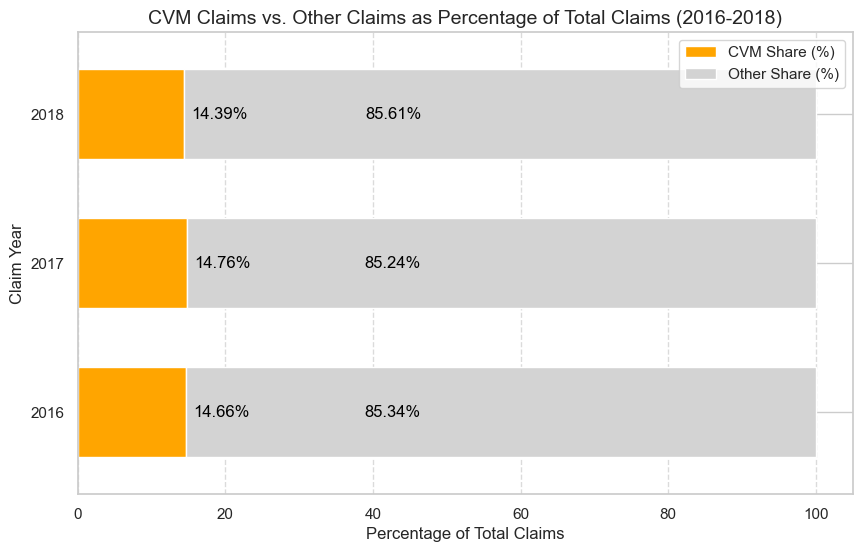

In [851]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Filter the DataFrame for CVM claims and the years 2016, 2017, 2018
cvm_claims = medicare_df_cleaned[(medicare_df_cleaned['hcpcs_code'].isin(cvm_hcpcs_codes)) & 
                                 (medicare_df_cleaned['claim_year'].isin([2016, 2017, 2018]))]

# Calculate total claims per year
total_claims_per_year = medicare_df_cleaned[medicare_df_cleaned['claim_year'].isin([2016, 2017, 2018])].groupby('claim_year').size()

cvm_claims_per_year = cvm_claims.groupby('claim_year').size()

# Calculate CVM share and other share as a percentage of total claims
cvm_share_per_year = (cvm_claims_per_year / total_claims_per_year) * 100
other_share_per_year = 100 - cvm_share_per_year

sns.set(style="whitegrid")

# Create a DataFrame for plotting
share_df = pd.DataFrame({
    'CVM Share (%)': cvm_share_per_year,
    'Other Share (%)': other_share_per_year
})

fig, ax = plt.subplots(figsize=(10, 6))

# Plot CVM share and other share as stacked bars
share_df.plot(kind='barh', stacked=True, color=['orange', 'lightgray'], ax=ax, width=0.6)

# Add data labels for CVM share on each bar
for i, (cvm_share, other_share) in enumerate(zip(cvm_share_per_year, other_share_per_year)):
    ax.text(cvm_share + 1, i, f'{cvm_share:.2f}%', va='center', ha='left', fontsize=12, color='black')
    ax.text(other_share / 2, i, f'{other_share:.2f}%', va='center', ha='center', fontsize=12, color='black')

ax.set_ylabel('Claim Year', fontsize=12)
ax.set_xlabel('Percentage of Total Claims', fontsize=12)
ax.set_title('CVM Claims vs. Other Claims as Percentage of Total Claims (2016-2018)', fontsize=14)

plt.yticks(range(len(share_df.index)), [2016, 2017, 2018])
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


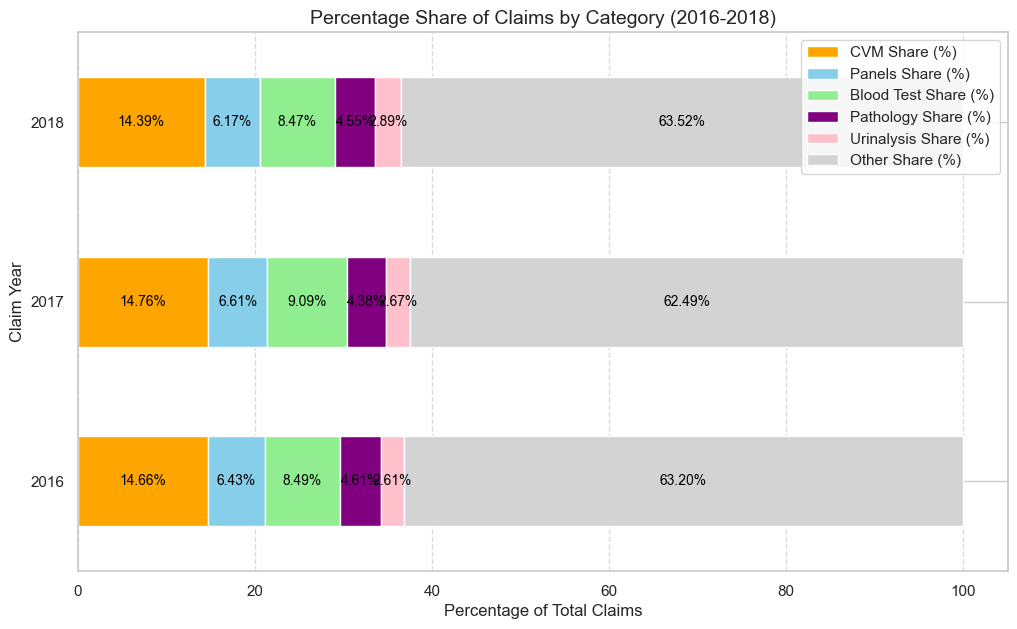

In [852]:
# Calculate total claims per year
total_claims_per_year = medicare_df_cleaned[medicare_df_cleaned['claim_year'].isin([2016, 2017, 2018])].groupby('claim_year').size()

# Function to calculate claims per category and year
def get_claims_per_category(hcpcs_codes):
    return medicare_df_cleaned[(medicare_df_cleaned['hcpcs_code'].isin(hcpcs_codes)) & 
                               (medicare_df_cleaned['claim_year'].isin([2016, 2017, 2018]))].groupby('claim_year').size()

# Calculate claims per year for each category
cvm_claims_per_year = get_claims_per_category(cvm_hcpcs_codes)
panels_claims_per_year = get_claims_per_category(panels_hcpcs_codes)
blood_test_claims_per_year = get_claims_per_category(blood_test_hcpcs_codes)
pathology_claims_per_year = get_claims_per_category(pathology_hcpcs_codes)
urinalysis_claims_per_year = get_claims_per_category(urinalysis_hcpcs_codes)

# Calculate share percentages
cvm_share = (cvm_claims_per_year / total_claims_per_year) * 100
panels_share = (panels_claims_per_year / total_claims_per_year) * 100
blood_test_share = (blood_test_claims_per_year / total_claims_per_year) * 100
pathology_share = (pathology_claims_per_year / total_claims_per_year) * 100
urinalysis_share = (urinalysis_claims_per_year / total_claims_per_year) * 100

# Calculate Other Share as the remainder
other_share = 100 - (cvm_share + panels_share + blood_test_share + pathology_share + urinalysis_share)

# Combine shares into a DataFrame for plotting
share_df = pd.DataFrame({
    'CVM Share (%)': cvm_share,
    'Panels Share (%)': panels_share,
    'Blood Test Share (%)': blood_test_share,
    'Pathology Share (%)': pathology_share,
    'Urinalysis Share (%)': urinalysis_share,
    'Other Share (%)': other_share
})

sns.set(style="whitegrid")

# Plotting the stacked bar chart
fig, ax = plt.subplots(figsize=(12, 7))
share_df.plot(kind='barh', stacked=True, color=['orange', 'skyblue', 'lightgreen', 'purple', 'pink', 'lightgray'], ax=ax)

# Adding data labels for each category's share on each bar
for i in range(len(share_df.index)):
    cumulative_share = 0
    for col in share_df.columns:
        share = share_df[col].iloc[i]
        if share > 0:
            ax.text(cumulative_share + share / 2, i, f'{share:.2f}%', ha='center', va='center', fontsize=10, color='black')
        cumulative_share += share

# Set labels and title
ax.set_ylabel('Claim Year', fontsize=12)
ax.set_xlabel('Percentage of Total Claims', fontsize=12)
ax.set_title('Percentage Share of Claims by Category (2016-2018)', fontsize=14)

# Customize y-axis tick labels and gridlines
plt.yticks(range(len(share_df.index)), [2016, 2017, 2018])
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.show()

Based on the trend in the chart above, we can see that the share of CVM (Cardiovascular Medicine) claims as a percentage of total claims remained relatively steady from 2016 to 2018, with only a slight decrease in 2018. Specifically:

2016: CVM claims made up 14.66% of total claims.

2017: CVM claims represented 14.76% of total claims.

2018: This percentage decreased slightly to 14.39%.

## Business Insights
Stable Demand for Cardiovascular Services: The relatively consistent percentage of CVM claims suggests a stable demand for cardiovascular services. This may indicate a steady prevalence of cardiovascular health issues among the population. For a pharmaceutical company, this could imply a sustained market for cardiovascular medications and related products, with little risk of sudden demand drops.

Potential for Growth in Cardiovascular Solutions: The slight decrease in the CVM share (from 14.76% to 14.39%) might suggest either an increase in other types of medical claims or a slight reduction in cardiovascular procedures. This could be an opportunity to explore why other categories may be growing or to investigate if there are unmet needs within cardiovascular care that could be addressed with innovative treatments, therapies, or medications.

Product Portfolio: Given that cardiovascular health issues appear to be consistently prevalent, the company may consider maintaining or even expanding its cardiovascular product line, ensuring that it caters to this stable demand. This also suggests that investments in research and development (R&D) for cardiovascular treatments are likely to be viable over the long term.

Market Competition or Shifts in Treatment Approaches: The slight decrease might indicate that some healthcare providers or patients are opting for alternative therapies or preventive measures outside of traditional cardiovascular treatments. The company could investigate if there's an increased adoption of lifestyle modifications or alternative treatments and consider how to position its products to support or complement these trends.

## Increase in ‘Other Share’:

The “Other Share” category, representing claims outside the main identified categories, has the largest proportion each year, covering 63.20% in 2016, 62.49% in 2017, and 63.52% in 2018.
This consistency indicates that while there is stable demand for specialized claims (like CVM), a significant portion of total claims remains in other, potentially diverse or general categories.
Slight Variability in Other Categories:

Panels Share: Fluctuated from 6.43% in 2016, 6.61% in 2017, and dropped to 6.17% in 2018.
Blood Test Share: Increased from 8.49% in 2016 to 9.09% in 2017 and then decreased to 8.47% in 2018.
Pathology Share and Urinalysis Share both showed minor decreases, indicating possible changes in demand for these specific diagnostic categories.
Business Insights

Stable Demand for Cardiovascular Services (CVM):
The consistent CVM share across these years, with minor fluctuations (remaining around 14-15%), suggests a sustained demand for cardiovascular treatments.
This implies a steady prevalence of cardiovascular issues, supporting ongoing investment in cardiovascular treatments or medications.
Strategic Implication: The company can maintain its cardiovascular product portfolio, potentially enhancing products to cater to this stable demand, as there’s minimal risk of sudden drops in demand.
Slight Decrease in 2018 CVM Claims (from 14.76% to 14.39%):

The slight drop in CVM share from 2017 to 2018 may indicate a potential shift, possibly due to increased competition or a growth in other types of claims.
Strategic Implication: Investigate whether this decrease is due to alternative therapies, preventive measures, or competitive products. Understanding these factors could inform adjustments in marketing strategies to highlight the benefits of the company’s cardiovascular solutions.
Opportunities in the ‘Other Share’ Category:

With “Other Share” consistently representing over 60% of claims, there may be emerging medical needs or diverse categories contributing to this portion.
Strategic Implication: Conduct further analysis to break down the “Other Share” category. If significant growth in specific subcategories is identified, the company could consider expanding its product line to cover these growing areas.
Growing Need for Comprehensive and Cost-Effective Treatments:

The slight decline in categories like pathology and urinalysis might indicate shifts toward preventive or non-invasive diagnostics, especially if providers are aiming to reduce costs.
Strategic Implication: Developing or marketing cost-effective cardiovascular products, possibly aligned with preventive measures, could strengthen market position

## Q2. Evaluate the HCP behavior in context of claim volume from 2016-2018. How many HCPs are submitting 1 CVM claim; how many HCPs are associated with more than 10 claims, etc.? Once you perform this analysis, explain how this trend can influence the sales force deployment. That is, how would you segment the HCPs and how would you allocate In-Person (sales force) vs Non-Personal Promotions (NPP, i.e. Emails, Social Media, Digital etc.) efforts?

C:\Users\ravik\AppData\Local\Temp\ipykernel_45748\4121738363.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=hcp_category_counts.index, y=hcp_category_counts.values, palette="viridis", hue=None, ax=ax, legend=False)


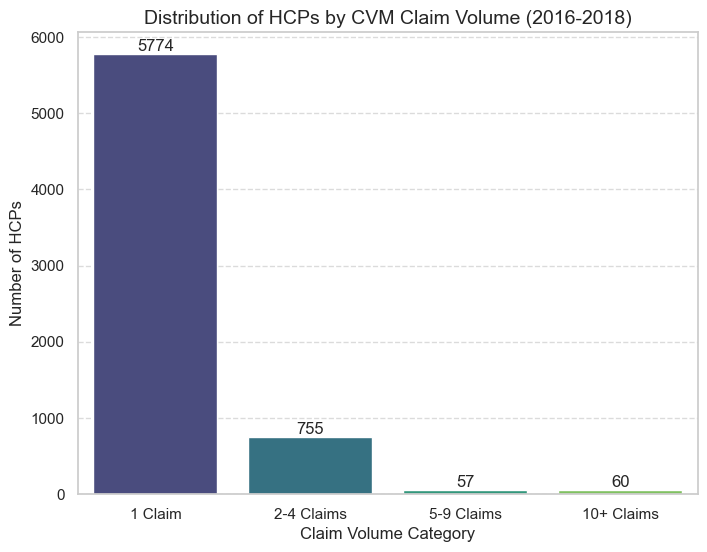

In [853]:

cvm_claims = medicare_df_cleaned[(medicare_df_cleaned['hcpcs_code'].isin(cvm_hcpcs_codes)) & 
                                   (medicare_df_cleaned['claim_year'].isin([2016, 2017, 2018]))]

# Group by HCP and count the number of claims per HCP
hcp_claim_counts = cvm_claims.groupby('npi_id').size()

# Categorize HCPs based on the number of claims submitted using new bins
hcp_category_counts = pd.cut(hcp_claim_counts, bins=[0, 1, 4, 9, float('inf')], 
                             labels=['1 Claim', '2-4 Claims', '5-9 Claims', '10+ Claims']).value_counts().sort_index()


sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(8, 6))


sns.barplot(x=hcp_category_counts.index, y=hcp_category_counts.values, palette="viridis", hue=None, ax=ax, legend=False)

for i, count in enumerate(hcp_category_counts.values):
    ax.text(i, count + 2, f'{count}', ha='center', va='bottom', fontsize=12)

# Set labels and title for the bar chart
ax.set_xlabel('Claim Volume Category', fontsize=12)
ax.set_ylabel('Number of HCPs', fontsize=12)
ax.set_title('Distribution of HCPs by CVM Claim Volume (2016-2018)', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\ravik\AppData\Local\Temp\ipykernel_45748\1871739489.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cvm_claims['claim_year'] = cvm_claims['claim_year'].astype(int)


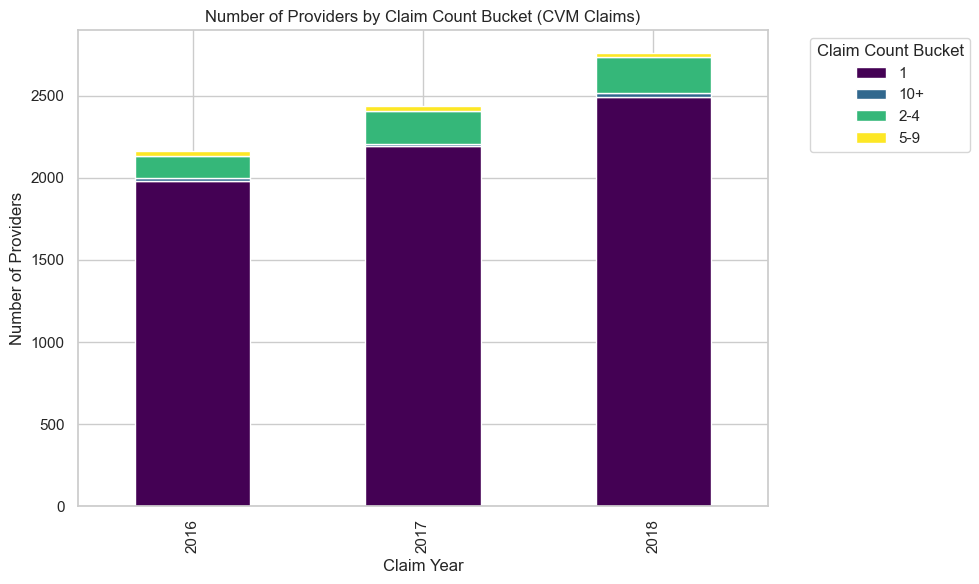

In [854]:


# 1. Define the CVM codes and filter the DataFrame for valid records
cvm_claims = medicare_df_cleaned[(medicare_df_cleaned['hcpcs_code'].isin(cvm_hcpcs_codes)) &
                                   (medicare_df_cleaned['npi_id'].notnull())]

cvm_claims['claim_year'] = cvm_claims['claim_year'].astype(int)

# 2. Count the CVM claims on a year & provider level
provider_claim_counts = cvm_claims.groupby(['claim_year', 'npi_id']).size().reset_index(name='claim_count')

# 3. Categorize the number of claims into different buckets
def categorize_claims(count):
    if count == 1:
        return '1'
    elif 2 <= count <= 4:
        return '2-4'
    elif 5 <= count <= 9:
        return '5-9'
    else:
        return '10+'

provider_claim_counts['claim_bucket'] = provider_claim_counts['claim_count'].apply(categorize_claims)

bucket_counts = provider_claim_counts.groupby(['claim_year', 'claim_bucket']).npi_id.nunique().reset_index(name='provider_count')

pivot_table = bucket_counts.pivot(index='claim_year', columns='claim_bucket', values='provider_count').fillna(0)

# 4. Create the stacked bar chart
sns.set(style="whitegrid")
pivot_table.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='viridis')

plt.xlabel('Claim Year')
plt.ylabel('Number of Providers')
plt.title('Number of Providers by Claim Count Bucket (CVM Claims)')
plt.legend(title='Claim Count Bucket', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

plt.show()



 Given this data, we can adopt a tailored approach for salesforce deployment to maximize relationship-building and optimize resource allocation. Below is a proposed segmentation and strategy for each category of HCPs:

## 1. 10+ Claims (High Priority, High Engagement)
In-Person Efforts: Very High Frequency

Non-Personal Promotion (NPP): Minimal

Approach: HCPs with 10 or more claims represent the highest level of interest and potential. Since this will be the salesforce's first point of contact, it’s essential to focus on building strong, personalized relationships through frequent face-to-face interactions. This group should be prioritized for in-person visits, as they are most likely to benefit from direct support and engagement. Minimal NPP can be used as supplementary support to reinforce the information shared in person, but the primary focus should be personal interaction.
## 2. 5-9 Claims (Medium-High Priority, Moderate Engagement)
In-Person Efforts: Moderate to High Frequency

NPP: Moderate

Approach: HCPs in this category show moderate interest, with multiple claims that indicate potential for growth. A hybrid approach, combining regular in-person visits with digital outreach, is ideal here. The salesforce can engage these HCPs with occasional face-to-face meetings to nurture the relationship and address specific needs, while also using NPP efforts such as email newsletters or social media updates to maintain visibility and engagement. This balance allows for cost-effective relationship-building, keeping these HCPs engaged without overwhelming resources.
## 3. 2-4 Claims (Moderate Priority, Low-Medium Engagement)
In-Person Efforts: Low Frequency

NPP: High Frequency

Approach: This group has shown some engagement with a few CVM claims, though not at the level of the higher categories. For these HCPs, NPP channels should take the lead, including regular digital communications like email campaigns, informative newsletters, and possibly online educational sessions. Occasional in-person visits can be scheduled to assess their needs and build rapport, but the primary focus will remain on maintaining consistent but low-cost digital interactions to keep them engaged and informed.
## 4. 1 Claim (Low Priority, Minimal Engagement)
In-Person Efforts: Very Low Frequency

NPP: Very High Frequency

Approach: HCPs with only one CVM claim show limited interest and thus represent a lower priority for resource allocation. A mostly NPP-based approach is most suitable for this segment. Digital channels, such as emails, online newsletters, and social media posts, should be the primary means of outreach to keep this group aware of CVM updates without committing significant in-person time. This low-cost strategy helps maintain a presence with these HCPs, with the potential for deeper engagement if their claim activity increases over time.

##Summary of Deployment Plan
This segmentation approach aligns salesforce resources to match the engagement level of each HCP group. High-engagement providers (10+ claims) receive dedicated, personalized attention, while those with fewer claims are maintained through cost-effective digital outreach. This strategic allocation ensures that salesforce efforts are maximized for high-value HCPs, while still maintaining visibility and support across all segments.

In essence, prioritizing high-frequency in-person visits for top-tier HCPs fosters deep, valuable relationships. Meanwhile, leveraging NPP for lower-engagement providers maximizes efficiency, keeping them informed and connected without excessive investment. This balanced strategy allows the salesforce to build and sustain meaningful relationships across the spectrum of engagement levels.

## Q3. Evaluate the Patient Age demographics in the context of claim volume from 2016-2018. Bucket the patients into groups based on their age and explain the trends. How would you position the Marketing Budgets and the Promotions with respect to the changing landscape of the CVM claims and the respective patient segments? 

C:\Users\ravik\AppData\Local\Temp\ipykernel_45748\3694027148.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_group_claim_counts.index, y=age_group_claim_counts.values, palette="coolwarm", ax=ax)


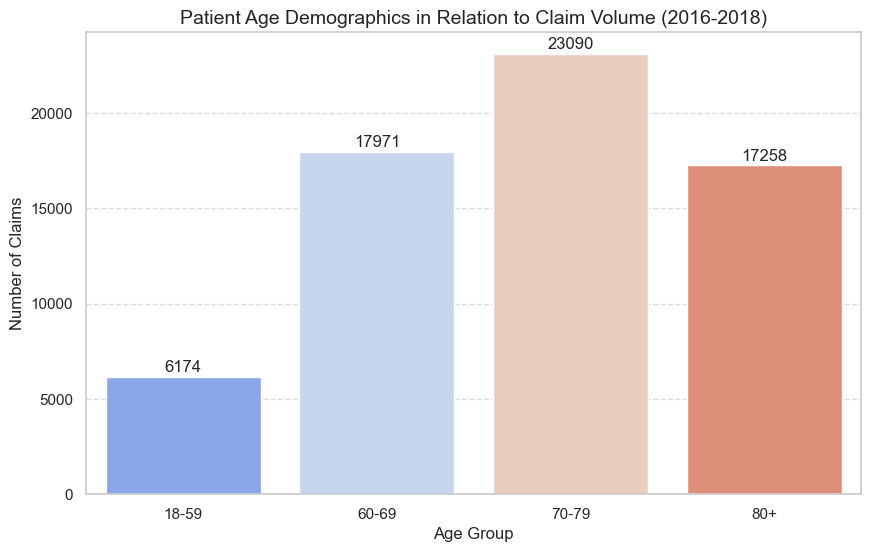

In [855]:


claims_2016_2018 = medicare_df_cleaned[medicare_df_cleaned['claim_year'].isin([2016, 2017, 2018])]

# Define new age bins and labels for bucketing
age_bins = [18, 59, 69, 79, float('inf')]
age_labels = ['18-59', '60-69', '70-79', '80+']

claims_2016_2018['age_group'] = pd.cut(claims_2016_2018['patient_age'], bins=age_bins, labels=age_labels, right=False)

age_group_claim_counts = claims_2016_2018['age_group'].value_counts().sort_index()

sns.set(style="whitegrid")
fig, ax = plt.subplots(figsize=(10, 6))

# Create a bar chart for claim counts by age group
sns.barplot(x=age_group_claim_counts.index, y=age_group_claim_counts.values, palette="coolwarm", ax=ax)

for i, count in enumerate(age_group_claim_counts.values):
    ax.text(i, count + 100, f'{count}', ha='center', va='bottom', fontsize=12)

# Set labels and title for the bar chart
ax.set_xlabel('Age Group', fontsize=12)
ax.set_ylabel('Number of Claims', fontsize=12)
ax.set_title('Patient Age Demographics in Relation to Claim Volume (2016-2018)', fontsize=14)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()


C:\Users\ravik\AppData\Local\Temp\ipykernel_45748\615677569.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  claims_count = cvm_claims.groupby(['claim_year', 'age_group']).size().reset_index(name='claim_count')


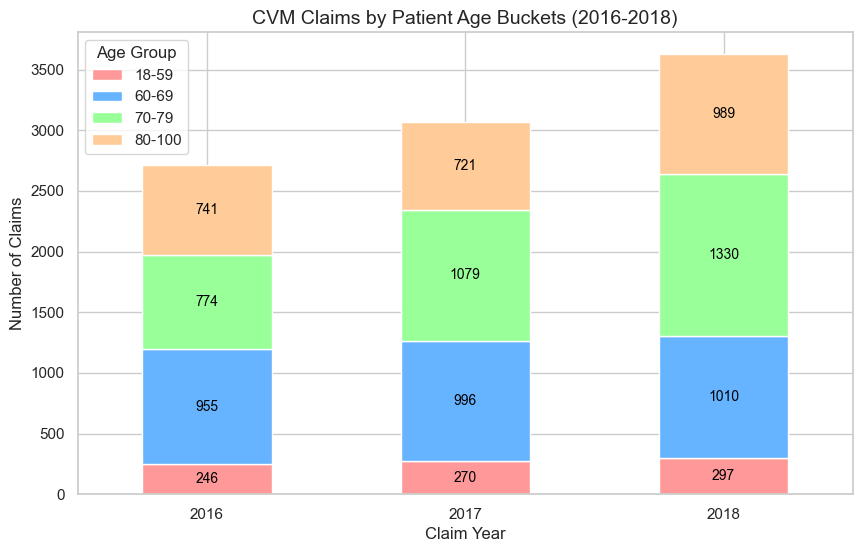

In [856]:

cvm_claims = medicare_df_cleaned[
    (medicare_df_cleaned['hcpcs_code'].isin(cvm_hcpcs_codes)) & 
    (medicare_df_cleaned['claim_year'].isin([2016, 2017, 2018])) & 
    (medicare_df_cleaned['patient_age'] > 0)
].copy()

# Define age bins and labels for bucketing
age_bins = [18, 60, 70, 80, 101]  # 101 to include 100 in the last bucket
age_labels = ['18-59', '60-69', '70-79', '80-100']

cvm_claims.loc[:, 'age_group'] = pd.cut(cvm_claims['patient_age'], bins=age_bins, labels=age_labels, right=False)

# Count the number of claims per year and age group
claims_count = cvm_claims.groupby(['claim_year', 'age_group']).size().reset_index(name='claim_count')

pivoted_claims = claims_count.pivot(index='claim_year', columns='age_group', values='claim_count').fillna(0)

# Create a stacked bar chart
fig, ax = plt.subplots(figsize=(10, 6))

colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
pivoted_claims.plot(kind='bar', stacked=True, ax=ax, color=colors)

# Set labels and title
ax.set_ylabel('Number of Claims', fontsize=12)
ax.set_xlabel('Claim Year', fontsize=12)
ax.set_title('CVM Claims by Patient Age Buckets (2016-2018)', fontsize=14)

# Customize x-axis ticks
ax.set_xticklabels(pivoted_claims.index, rotation=0)

# Adding data labels
for container in ax.containers:
    for bar in container:
        height = bar.get_height()
        if height > 0:  # Only label non-zero segments
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                bar.get_y() + height / 2,
                int(height),
                ha='center',
                va='center',
                fontsize=10,
                color='black'
            )

plt.legend(title='Age Group')
plt.show()


## 1. Focus on the 70-79 and 80-100 Age Group
Highlight Senior-Friendly Services for 70-79 and 80-100 Age Groups: These age brackets have the highest claim volumes, especially in 2018. As this trend continues, a substantial portion of the marketing budget should target this older demographic.

Promote Accessibility and Supportive Care: Campaigns should focus on making services accessible and comfortable for seniors. Highlight benefits like home visits, easy transportation, or personalized care plans, and consider partnerships with community centers or senior networks to reach this audience more effectively.

## 2. Promote and Engage Younger Seniors in Preventive Care
Target the 60-69 Age Group with Preventive Health Campaigns: This age group shows a consistent volume of claims, indicating an opportunity to promote preventive care. These patients might be more open to regular check-ups or early interventions before conditions become severe.

Promote Wellness and Early Detection Programs: Allocate a portion of the budget to campaigns around preventive screenings, lifestyle management, and wellness programs. Emphasize early detection benefits through newsletters, social media, and other channels that reach this age group.

## 3. Increase Budget and Adapt Promotions for Year-on-Year Growth
Prepare for Rising Demand in 2018: The overall increase in claims from 2016 to 2018 suggests a growing awareness or need for CVM services. Adjust the marketing budget annually to support this increased demand.

Seasonal Campaigns for Peak Times: CV-related health issues may rise during certain seasons, like winter, which could increase demand. Consider offering seasonal discounts or special packages during these times to attract patients when they’re most in need of CVM care.

## 4. Personalize Campaigns for Each Age Group
Tailor Messages for Age-Specific Needs: Segment promotions by age group to deliver more relevant information. For example, younger patients in the 18-59 range might appreciate digital tools like telehealth options, while older adults may respond better to campaigns emphasizing in-person care and support from family.

Differentiate Between Preventive and Reactive Marketing: Younger patients (18-59) represent an audience for preventive care. Promote heart health, lifestyle programs, and wellness workshops to them, while focusing on managing existing conditions for older groups.

## Q4. How do CVM claims differ across gender over the years 2016 to 2018? Are there noticeable trends or differences between male and female patients in the volume of CVM claims, and how might this insight influence marketing strategies for gender-targeted healthcare services?

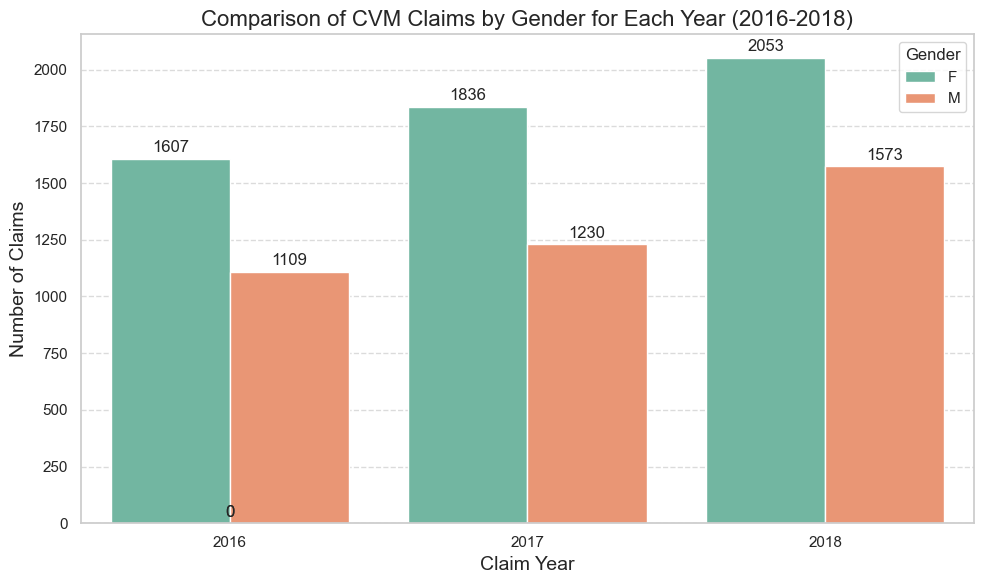

In [857]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cvm_claims and gender_claims have already been defined
plt.figure(figsize=(10, 6))

# Plot the data as a grouped bar plot
bar_plot = sns.barplot(data=gender_claims, x='claim_year', y='claim_count', hue='patient_gender', palette='Set2')

# Add labels for each bar
for p in bar_plot.patches:
    bar_plot.annotate(format(p.get_height(), '.0f'), 
                      (p.get_x() + p.get_width() / 2., p.get_height()), 
                      ha = 'center', va = 'center', 
                      xytext = (0, 8), textcoords = 'offset points')

# Title and labels
plt.title('Comparison of CVM Claims by Gender for Each Year (2016-2018)', fontsize=16)
plt.xlabel('Claim Year', fontsize=14)
plt.ylabel('Number of Claims', fontsize=14)
plt.legend(title='Gender')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


## Observed Trends in CVM Claims by Gender
## Higher Claim Volume Among Female Patients:

Across all three years, female patients consistently had more CVM claims than male patients.

2016: Female claims were around 1,500, while male claims were just above 1,000.

2017: Female claims remained higher, though the gap slightly decreased, with claims just under 2,000 for females and around 1,400 for males.

2018: Both male and female claims increased, with female claims peaking slightly above 2,000, while male claims approached 1,750.

## Increasing CVM Claims for Both Genders:

From 2016 to 2018, there is a noticeable increase in the number of CVM claims for both male and female patients.
This growth suggests a rising demand for cardiovascular healthcare services among both men and women, potentially driven by factors like an aging population or increased awareness of cardiovascular health.
Narrowing Gender Gap Over Time:

While female patients started with a notably higher claim volume in 2016, the difference between male and female claims seems to be narrowing by 2018.

This could suggest that cardiovascular conditions are becoming increasingly prevalent or recognized among men over time, potentially due to improved diagnostic practices or lifestyle changes impacting both genders.
Strategic Insights and Implications for a Pharmaceutical Company
Gender-Specific Marketing Campaigns:

Given the consistently higher number of claims among female patients, it may be valuable to develop targeted marketing campaigns focused on women’s cardiovascular health.
Emphasizing preventative care, heart health awareness, and the importance of regular check-ups could resonate well with this demographic, especially for treatments that address risk factors prevalent in women, such as hypertension and cholesterol management.
Product Development for Gender-Specific Health Needs:

Cardiovascular health can manifest differently between men and women, with unique risk factors, symptoms, and treatment needs. Acknowledging these differences in product offerings could strengthen the company’s portfolio.
Developing or highlighting products that cater to female-specific cardiovascular issues (e.g., pregnancy-related heart risks, post-menopausal health) could help capture this steady demand among women. Similarly, targeting male-centric issues as their claim volume rises could provide growth opportunities.

## Educational Initiatives on Cardiovascular Risks for Men:

Since male claims are increasing, this could be a timely opportunity to launch educational initiatives that focus on men’s cardiovascular health, emphasizing preventive measures and the importance of early diagnosis.
Addressing lifestyle factors common among men, such as high-stress occupations or lifestyle habits, could position the company as proactive in promoting heart health awareness among men.

## Collaborations with Healthcare Providers for Gender-Sensitive Care:

Partnering with healthcare providers to promote gender-sensitive approaches in cardiovascular treatment could enhance the company’s market reach.
This could involve training programs for healthcare professionals to recognize gender-specific symptoms and risk factors, thereby encouraging a holistic approach to cardiovascular care that includes the company’s products as integral treatment options.
Product Differentiation Based on Gender Insights:

Highlighting any existing cardiovascular products with unique benefits for either gender can differentiate the company in a competitive market.
For instance, if certain drugs have shown better outcomes or fewer side effects in one gender, these attributes can be emphasized in marketing materials, helping to create a more personalized approach to cardiovascular treatment.